<a href="https://colab.research.google.com/github/OlhaAD/Comprehensive-analysis-of-economic-data-and-the-labor-market-in-the-United-States/blob/main/USAEmpUnempTax2020_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Link to CSV file in Google Drive / Ссылка на CSV файл в Google Диске
google_drive_link = r"https://drive.google.com/file/d/1uGojDCBtGp2OhWQ4keRbNJlIrjVJ6fAT/view?usp=sharing"
# Retrieving the file ID from the link / Извлекаем идентификатор файла из ссылки
file_id = google_drive_link.split("/")[5]
# Generating a direct link to download the file / Формируем прямую ссылку для загрузки файла
download_link = f"https://drive.google.com/uc?id={file_id}"
# Loading data from a CSV file into a DataFrame / Загрузка данных из файла CSV в DataFrame
df = pd.read_csv(download_link)

In [3]:
print(df.head())

   Fiscal Year Quarter Ending  County_Number County        City  \
0         2012     09/30/2011              1  Adair  Greenfield   
1         2012     09/30/2011              1  Adair       Adair   
2         2012     09/30/2011              1  Adair  Fontanelle   
3         2012     09/30/2011              1  Adair      Stuart   
4         2012     09/30/2011              1  Adair      Orient   

   Number of Returns  Taxable Sales  Computed Tax  Percent of Tax  \
0                112      5806502.0      347969.0               7   
1                 58      3113359.0      184309.0               4   
2                 38      1175786.0       70547.0               1   
3                 28      2760190.0      158996.0               3   
4                 16       274254.0       16449.0               0   

   FIPS County Code  Primary Lat Dec  Primary Long Dec  
0             19001        41.330746        -94.470941  
1             19001        41.330746        -94.470941  
2          

***Quarterly Retail Sales Tax Data by County and City***

**Fiscal Year:** The year to which the financial report relates / Год, к которому относится финансовый отчет.

**Quarter Ending:** End date of the quarter to which the report relates / Дата окончания квартала, к которому относится отчет.

**County_Number:** County number / Номер округа.

**County:** County name / Название округа.

**City:** City name / Название города.

**Number of Returns:** Number of tax refunds or declarations for a given county/city / Количество налоговых возвратов или деклараций по данному округу/городу.

**Taxable Sales:** Amount of taxable sales in a given county/city / Сумма налогооблагаемых продаж в данном округе/городе.

**Computed Tax:** Calculated tax payment based on taxable sales / Вычисленный налоговый платеж на основе налогооблагаемых продаж.

**Percent of Tax:** Percentage tax rate of total taxable sales / Процентная ставка налога от общей суммы налогооблагаемых продаж.

**FIPS County Code:** Unique county code (County) in the FIPS standard /Уникальный код округа (County) в стандарте FIPS (Federal Information Processing Standards).

**Primary Lat Dec:** Latitude (geographic coordinate) of the main population center in a given county/city / Широта (географическая координата) главного населенного пункта в данном округе/городе.

**Primary Long Dec:** Longitude (geographic coordinate) of the main population center in a given county/city / Долгота (географическая координата) главного населенного пункта в данном округе/городе.

In [4]:
# Determine the size of df / определяем размер df
df.shape

(40820, 12)

In [5]:
# Information about data types and omissions / информация о типах данных и пропусках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40820 entries, 0 to 40819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fiscal Year        40820 non-null  int64  
 1   Quarter Ending     40820 non-null  object 
 2   County_Number      40820 non-null  int64  
 3   County             40820 non-null  object 
 4   City               40820 non-null  object 
 5   Number of Returns  40820 non-null  int64  
 6   Taxable Sales      40820 non-null  float64
 7   Computed Tax       40820 non-null  float64
 8   Percent of Tax     40820 non-null  int64  
 9   FIPS County Code   40820 non-null  int64  
 10  Primary Lat Dec    40820 non-null  float64
 11  Primary Long Dec   40820 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 3.7+ MB


In [6]:
# Count the number of unique 'FIPS County Code' values and output / Подсчет количества уникальных значений 'FIPS County Code' и вывод
print(df.groupby('FIPS County Code').size().reset_index(name='Count'))

    FIPS County Code  Count
0              19001    344
1              19003    111
2              19005    339
3              19007    269
4              19009    182
..               ...    ...
94             19189    341
95             19191    364
96             19193    688
97             19195    333
98             19197    329

[99 rows x 2 columns]


In [7]:
# Count the number of unique 'County' values and output / Подсчет количества уникальных значений 'County' и вывод
print(df.groupby('County').size().reset_index(name='Count'))

        County  Count
0        Adair    344
1        Adams    111
2    Allamakee    339
3    Appanoose    269
4      Audubon    182
..         ...    ...
94   Winnebago    341
95  Winneshiek    364
96    Woodbury    688
97       Worth    333
98      Wright    329

[99 rows x 2 columns]


In [8]:
# Checking for one-to-one correspondence / Проверяю на взаимо-однозначное соответствие
print(df.groupby('FIPS County Code')['County'].nunique().max())
print(df.groupby('County')['FIPS County Code'].nunique().max())

1
1


If both values are 1, this confirms that there is a one-to-one mapping between the FIPS County Code and County. In this case, you can use 'County' as a key for operations in Pandas

Если оба значения равны 1, это подтверждает, что существует взаимно-однозначное соответствие между FIPS County Code и County. В таком случае можно использовать 'County' в качестве ключа для операций в Pandas

In [9]:
# Grouping and summing data for each County for all years / группировка и суммирования данных по каждому County за все года
df1 = df.groupby(['County']).sum()['Computed Tax']
# Convert Series to DataFrame and reset index / Преобразование Series в DataFrame и сброс индекса
df1 = df1.reset_index()
# Now df1 is a DataFrame where the first column is Country and the second is Computed Tax / Теперь df1 - это DataFrame, где первый столбец -County, а второй - Computed Tax
df1.columns = ['County', 'Computed Tax']
df1.head()

,County,Computed Tax
0,Adair,48089211.07
1,Adams,24031426.63
2,Allamakee,79443446.73
3,Appanoose,87763201.93
4,Audubon,27550875.48


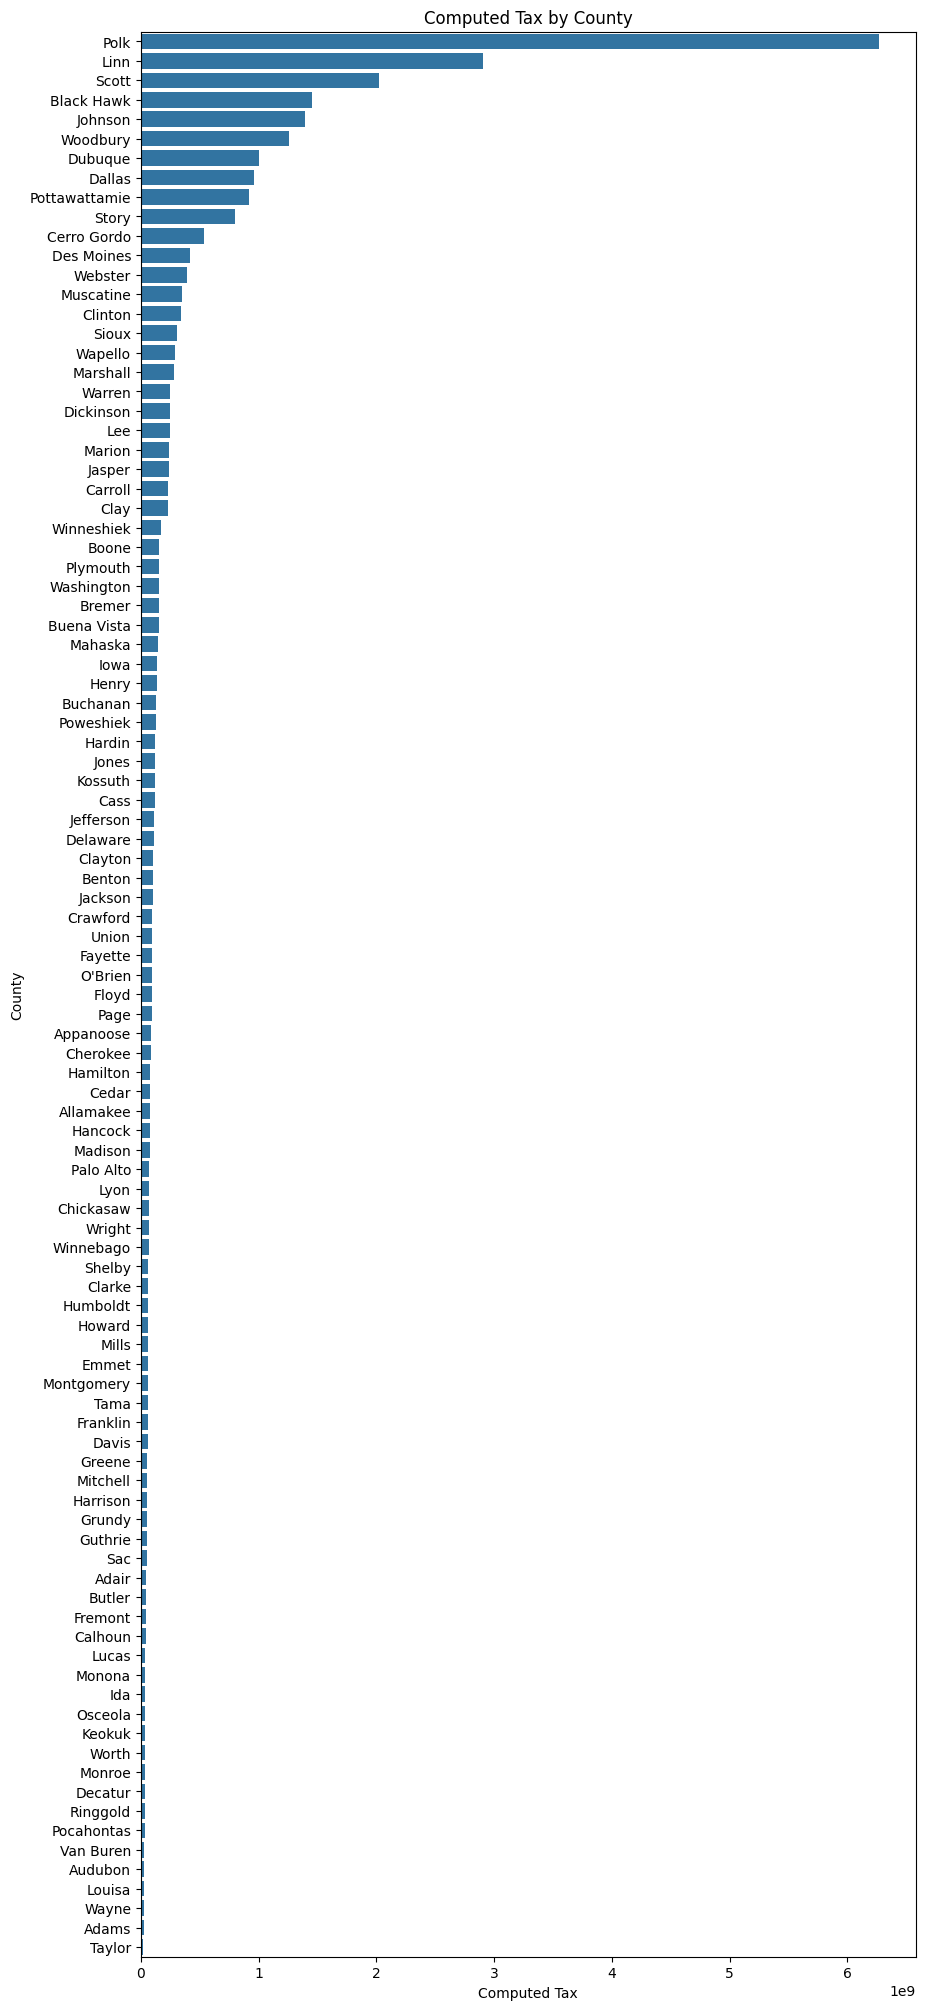

In [10]:
# Sorting data for better visualization / Сортировка данных для лучшей визуализации
df1_sorted = df1.sort_values('Computed Tax', ascending=False)

plt.figure(figsize=(10, 25))
sns.barplot(x='Computed Tax', y='County', data=df1_sorted)
plt.xlabel('Computed Tax')
plt.ylabel('County')
plt.title('Computed Tax by County')
plt.show()

In [11]:
# Grouping data by Fiscal Year, County and FIPS County Code with Computed Tax summation / Группировка данных по Fiscal Year, County и FIPS County Code с суммированием Computed Tax
df2 = df.groupby(['Fiscal Year', 'County', 'FIPS County Code'])['Computed Tax'].sum().reset_index()
print(df2.head())
print(df2.shape)

   Fiscal Year     County  FIPS County Code  Computed Tax
0         2012      Adair             19001     3388812.0
1         2012      Adams             19003     1559340.0
2         2012  Allamakee             19005     5648573.0
3         2012  Appanoose             19007     5976384.0
4         2012    Audubon             19009     2051058.0
(1287, 4)


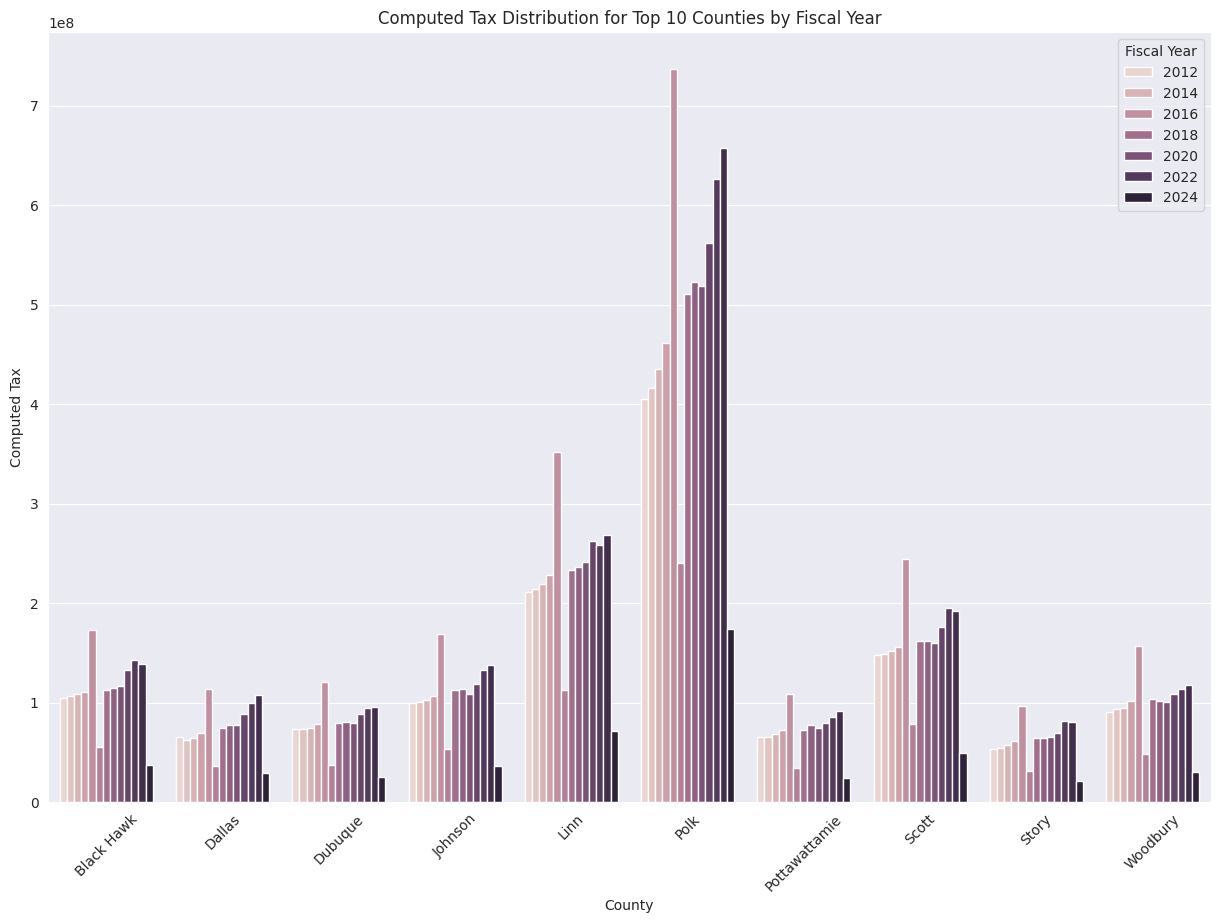

In [12]:
# Selecting the top-10 countiess by highest tax revenue / Отбираем топ-10 округов по наибольшему налоговому доходу
top_counties = df2.groupby('County')['Computed Tax'].sum().nlargest(10).index
# Filtering data for the top 10 districts / Фильтруем данные для топ-10 округов
df_top_counties = df2[df2['County'].isin(top_counties)]

# Building a Bar Chart for the top 10 counties / Построение столбчатой диаграммы (Bar Chart) для топ-10 округов
plt.figure(figsize=(15, 10))
sns.set_palette('RdYlBu')
sns.set_style(style = 'darkgrid')
sns.barplot(x='County', y='Computed Tax', hue='Fiscal Year', data=df_top_counties)
plt.title('Computed Tax Distribution for Top 10 Counties by Fiscal Year')
plt.xlabel('County')
plt.ylabel('Computed Tax')
plt.xticks(rotation=45)
plt.legend(title='Fiscal Year')
plt.show()

In [13]:
# Link to a CSV file in Google Drive that contains information about employed and unemployed people by year and district
# Ссылка на CSV файл в Google Диске который содержит информацию о занятых и безработных по годам и округам
google_drive_link1 = r"https://drive.google.com/file/d/1Z2l7U3NuFErRxFrg7KIpd1SrG6cTtiB8/view?usp=sharing"
# Retrieving the file ID from the link / Извлекаем идентификатор файла из ссылки
file_id1 = google_drive_link1.split("/")[5]
# Generating a direct link to download the file / Формируем прямую ссылку для загрузки файла
download_link1 = f"https://drive.google.com/uc?id={file_id1}"
# Loading data from a CSV file into a DataFrame / Загрузка данных из файла CSV в DataFrame
df3 = pd.read_csv(download_link1)

In [14]:
df3.tail()

,FIPS_Code,State,Area_Name,Attribute,Value
316628,72153,PR,"Yauco Municipio, PR",Unemployment_rate_2021,11.7
316629,72153,PR,"Yauco Municipio, PR",Civilian_labor_force_2022,10353.0
316630,72153,PR,"Yauco Municipio, PR",Employed_2022,9282.0
316631,72153,PR,"Yauco Municipio, PR",Unemployed_2022,1071.0
316632,72153,PR,"Yauco Municipio, PR",Unemployment_rate_2022,10.3


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316633 entries, 0 to 316632
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   FIPS_Code  316633 non-null  int64  
 1   State      316633 non-null  object 
 2   Area_Name  316633 non-null  object 
 3   Attribute  316633 non-null  object 
 4   Value      316633 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 12.1+ MB


**Unemployment and median household income for the U.S., States, and counties, 2000–22**


**FIPS_Code:**  Уникальный код округа (County) в стандарте FIPS (Federal Information Processing Standards) / State+county Federal Information Processing Standard (FIPS) code

**State:** Аббревиатура штата / State abbreviation

**Area_Name:** Название населенного пункта / State or county name

**Attribute:**Название аттрибута, которое состоит из аттрибута и года / Name of attribute with year, например, Unemployment_rate_2022, Civilian_labor_force_2022, Employed_2022,....

**Value:** Соответсвующее значение аттрибута / Corresponding attribute value


In [16]:
# Separating attributes into name and year / Разделение атрибутов на название и год
# Extracting everything except numbers / Извлекаем все кроме цифр
df3['Base Attribute Name'] = df3['Attribute'].str.extract(r'([a-zA-Z_]+)')[0].str.rstrip('_')
# Extracting the year from an attribute/ Извлекаем год из атрибута
df3['Year'] = df3['Attribute'].str.extract(r'(\d{4})')
# Converting the data type of the Year column for later merging / Преобразование типа данных столбца Year для последующего слияния
df3['Year'] = df3['Year'].astype(int)

In [17]:
df3.head()

,FIPS_Code,State,Area_Name,Attribute,Value,Base Attribute Name,Year
0,0,US,United States,Civilian_labor_force_2000,142601576.0,Civilian_labor_force,2000
1,0,US,United States,Employed_2000,136904853.0,Employed,2000
2,0,US,United States,Unemployed_2000,5696723.0,Unemployed,2000
3,0,US,United States,Unemployment_rate_2000,4.0,Unemployment_rate,2000
4,0,US,United States,Civilian_labor_force_2001,143786537.0,Civilian_labor_force,2001


In [18]:
# Find all unique attributes/ Находим все уникальные аттрибуты
print(df3['Base Attribute Name'].unique())

['Civilian_labor_force' 'Employed' 'Unemployed' 'Unemployment_rate'
 'Median_Household_Income' 'Med_HH_Income_Percent_of_State_Total'
 'Rural_Urban_Continuum_Code' 'Urban_Influence_Code' 'Metro']


**'Civilian_labor_force'** Average annual civilian labor force / Среднегодовая численность гражданской рабочей силы

**'Employed'** Number of employees on average per year / Число занятых в среднем за год

**'Unemployed'** Average number of unemployed per year / Число безработых в среднем за год

**'Unemployment_rate'** Average annual unemployment rate / Уровень безработицы в среднем за год

**'Median_Household_Income'** Estimated average household income for the year / Оценка среднего дохода домохозяйства за год

**'Med_HH_Income_Percent_of_State_Total'** County median household income as a percentage of total state median household income / Средний доход домохозяйства округа в процентах от общего среднего дохода домохозяйства штата

**'Rural_Urban_Continuum_Code'** Code of the Rural-Urban Continuum / Кодекс сельско-городского континуума

**'Urban_Influence_Code'** City Influence Code / Кодекс городского влияния

**'Metro'** Metro dummy without metro 0 = no metro 1 = metro (based on 2013 OMB metropolitan area delimitation) / Фиктивное значение метро без метро 0 = без метро 1 = метро (на основе разграничения городских агломераций OMB 2013 г.)

In [19]:
# Filtering required attributes / Фильтрация необходимых атрибутов
attributes_needed = ['Civilian_labor_force', 'Employed', 'Unemployed', 'Unemployment_rate', 'Median_Household_Income', 'Med_HH_Income_Percent_of_State_Total']
df3_filtered = df3[df3['Base Attribute Name'].isin(attributes_needed)].copy()
print(df3_filtered.tail(20))

        FIPS_Code State            Area_Name                  Attribute  \
316613      72153    PR  Yauco Municipio, PR  Civilian_labor_force_2017   
316614      72153    PR  Yauco Municipio, PR              Employed_2017   
316615      72153    PR  Yauco Municipio, PR            Unemployed_2017   
316616      72153    PR  Yauco Municipio, PR     Unemployment_rate_2017   
316617      72153    PR  Yauco Municipio, PR  Civilian_labor_force_2018   
316618      72153    PR  Yauco Municipio, PR              Employed_2018   
316619      72153    PR  Yauco Municipio, PR            Unemployed_2018   
316620      72153    PR  Yauco Municipio, PR     Unemployment_rate_2018   
316621      72153    PR  Yauco Municipio, PR  Civilian_labor_force_2019   
316622      72153    PR  Yauco Municipio, PR              Employed_2019   
316623      72153    PR  Yauco Municipio, PR            Unemployed_2019   
316624      72153    PR  Yauco Municipio, PR     Unemployment_rate_2019   
316625      72153    PR  

In [20]:
# Create a pivot table pivot_df3 for each attribute / Создаем сводную таблицу pivot_df3 для каждого атрибута
pivot_df3 = df3_filtered.pivot_table(index=['FIPS_Code', 'State', 'Area_Name', 'Year'], columns='Base Attribute Name', values='Value', aggfunc='first').reset_index()

In [21]:
# Counting NaN values in each column / Подсчет NaN значений в каждом столбце
nan_counts = pivot_df3.isnull().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Base Attribute Name
FIPS_Code                                   0
State                                       0
Area_Name                                   0
Year                                        0
Civilian_labor_force                        0
Employed                                    0
Med_HH_Income_Percent_of_State_Total    71953
Median_Household_Income                 71952
Unemployed                                  0
Unemployment_rate                           0
dtype: int64


In [22]:
# Replacing NaN with zero values / Замена NaN на нулевые значения
pivot_df3.fillna(0, inplace=True)

In [23]:
# Data selection for 'US' only / Выбор данных только для 'US'
us_data = pivot_df3[pivot_df3['State'] == 'US']
print(us_data.head())

Base Attribute Name  FIPS_Code State      Area_Name  Year  \
0                            0    US  United States  2000   
1                            0    US  United States  2001   
2                            0    US  United States  2002   
3                            0    US  United States  2003   
4                            0    US  United States  2004   

Base Attribute Name  Civilian_labor_force     Employed  \
0                             142601576.0  136904853.0   
1                             143786537.0  136977996.0   
2                             144839298.0  136455783.0   
3                             145660094.0  136944522.0   
4                             146724795.0  138613904.0   

Base Attribute Name  Med_HH_Income_Percent_of_State_Total  \
0                                                     0.0   
1                                                     0.0   
2                                                     0.0   
3                                       

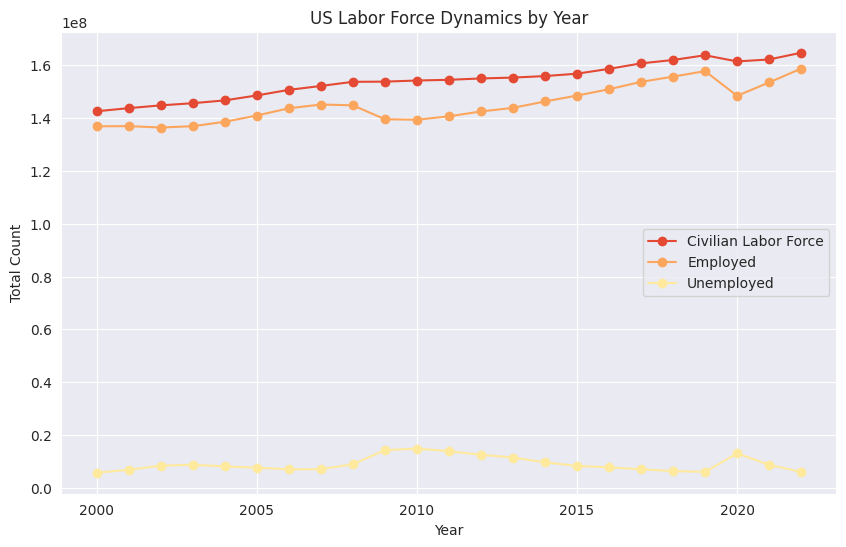

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Civilian_labor_force'], marker='o', label='Civilian Labor Force')
plt.plot(us_data['Year'], us_data['Employed'], marker='o', label='Employed')
plt.plot(us_data['Year'], us_data['Unemployed'], marker='o', label='Unemployed')
plt.title('US Labor Force Dynamics by Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.legend()
plt.grid(True)
plt.show()

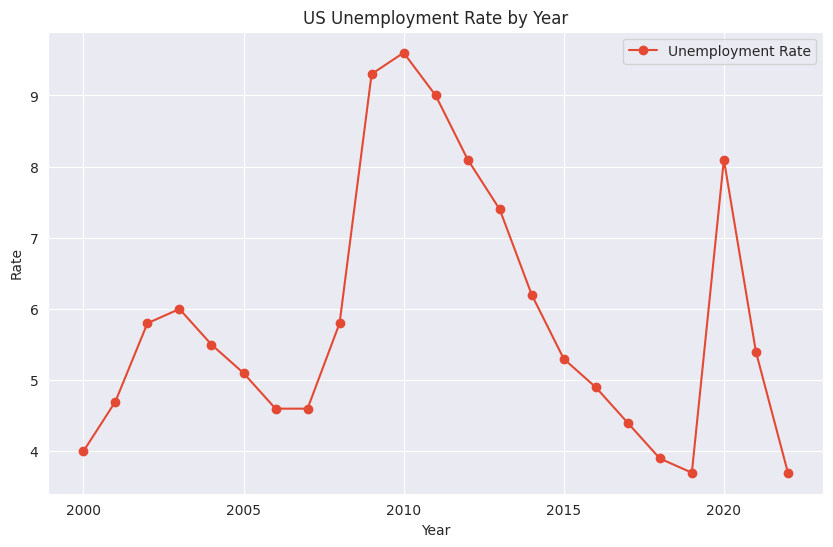

In [25]:
# Unemployment rate in the USA by year / Уровень безработиці по США по годам
plt.figure(figsize=(10, 6))
plt.plot(us_data['Year'], us_data['Unemployment_rate'], marker='o', label='Unemployment Rate')
plt.title('US Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()

*The increase in unemployment in the U.S. during 2007-2010 was largely due to the Great Recession, which was the longest economic downturn since World War II. It was marked by a significant drop in real GDP and a peak in the unemployment rate at 10% in October 2009. Factors contributing to the recession included a substantial decline in home prices, a significant fall in the stock market, and a decrease in the net worth of households and non-profit organizations. The crisis prompted various stimulus programs and Federal Reserve policies aimed at reviving economic growth and providing monetary stimulus.*

Рост безработицы в США в 2007-2010 годах во многом был обусловлен Великой рецессией, которая стала самым продолжительным экономическим спадом со времен Второй мировой войны. Он ознаменовался значительным падением реального ВВП и пиком уровня безработицы на уровне 10% в октябре 2009 года. Факторы, способствовавшие рецессии, включали существенное снижение цен на жилье, значительное падение фондового рынка и снижение чистая стоимость домохозяйств и некоммерческих организаций. Кризис вызвал появление различных программ стимулирования и политики Федеральной резервной системы, направленных на оживление экономического роста и предоставление денежно-кредитных стимулов.

In [26]:
# Count the number of unique states in the 'State' column / Подсчёт количества уникальных штатов в столбце 'State'
number_of_states = pivot_df3['State'].nunique()
print("Number of unique states in the DataFrame:", number_of_states)

Number of unique states in the DataFrame: 53


In [27]:
# Shapiro test for Unemployment_rate / Проводим тест Шапиро для Unemployment_rate
from scipy.stats import shapiro

stat, p = shapiro(pivot_df3['Unemployment_rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation / Интерпретация
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.881, p=0.000
Sample does not look Gaussian (reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


*The test statistic is less than 1, and combined with a very low p-value (less than the significance level, typically 0.05), this indicates that the unemployment data does not follow a normal distribution. When the p-value is less than the selected significance level (here assumed to be 0.05), the null hypothesis of a normal distribution is rejected. This means that the data has statistically significant deviations from the normal distribution. p-value may not be accurate for N > 5000 - This is a warning from the SciPy library that the accuracy of the Shapiro-Wilk test p-value decreases when using large samples (more than 5000 observations) . The Shapiro-Wilk test is optimized for smaller samples and may be less accurate with larger data sets. Therefore, we will conduct the test* * D'Agostino K^2 *


Статистика теста меньше 1, и в сочетании с очень низким p-значением (меньше уровня значимости, обычно 0.05), это указывает на то, что данные о безработице не следуют нормальному распределению. Когда p-значение меньше выбранного уровня значимости (здесь предполагается 0.05), нулевая гипотеза о нормальности распределения отвергается. Это означает, что данные имеют статистически значимые отклонения от нормального распределения.
p-value may not be accurate for N > 5000 (p-значение может быть ненадёжным для N > 5000) — это предупреждение библиотеки SciPy о том, что точность p-значения теста Шапиро-Уилка уменьшается при использовании больших выборок (более 5000 наблюдений). Тест Шапиро-Уилка оптимизирован для меньших выборок, и при больших объёмах данных его результаты могут быть менее точными.
Поэтому проведем тест **Д'Агостино K^2 **


In [28]:
from scipy.stats import normaltest

stat, p = normaltest(pivot_df3['Unemployment_rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation / Интерпретация
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=24597.513, p=0.000
Sample does not look Gaussian (reject H0)


*These results indicate that the distribution of unemployment data deviates significantly from the normal distribution:*

*Test statistic - A high test statistic indicates a significant deviation of the data distribution from the theoretical normal distribution. In the context of a normality test, a large statistic usually indicates the presence of skewness, kurtosis, or other anomalies that do not follow a normal distribution. P-value - A very small p-value (less than the specified significance level, usually 0.05) confirms the statistical significance of the test results. This means that you can confidently reject the null hypothesis that the data follows a normal distribution. Therefore, when working with the Unemployment rate, I will use the median*

*It is also possible to additionally look at the distribution histogram and this histogram shows the distribution of unemployment data, which does not correspond to the classic normal distribution. The main features of this distribution include: right-sided skewness, multiple peaks, and a long right tail, indicating outliers.*

Эти результаты указывают на то, что распределение данных по безработице значительно отклоняется от нормального распределения:

Статистика теста — высокое значение статистики теста указывает на значительное отклонение распределения данных от теоретического нормального распределения. В контексте теста на нормальность, большое значение статистики обычно указывает на наличие асимметрии, эксцесса или других аномалий, которые не соответствуют нормальному распределению.
P-значение — очень маленькое p-значение (меньше установленного уровня значимости, обычно 0.05), подтверждает статистическую значимость результатов теста. Это означает, что вы можете с уверенностью отвергнуть нулевую гипотезу о том, что данные следуют нормальному распределению.
Поэтому при работе с уровнем безработицы (Unemployment rate) буду использовать медиану

*You can also additionally view the distribution histogram and this histogram shows the distribution of unemployment data, which does not correspond to the classic normal distribution. The main features of this distribution include: right-sided skewness, multiple peaks, and a long right tail, indicating outliers.*

Также дополнительно можно посмотреть гистограмму распределения и эта гистограмма показывает распределение данных о безработице, которое не соответствует классическому нормальному распределению. Основные особенности этого распределения включают: правостороннюю асимметрию, множественные пики и длинный правый хвост, что указывает на выбросы.

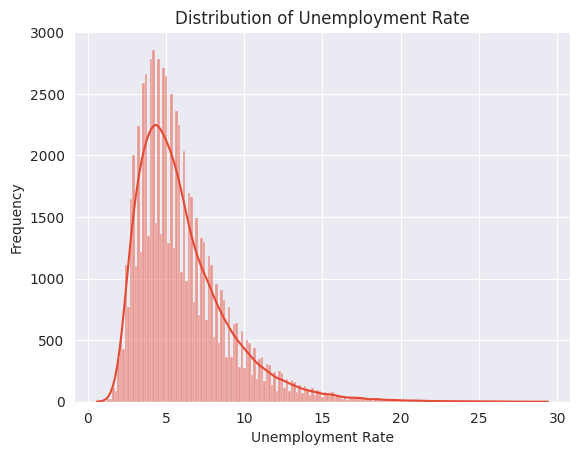

In [29]:
sns.histplot(pivot_df3['Unemployment_rate'], kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

In [30]:
# I conduct the *D'Agostino K^2 test in the same way for the remaining columns / Аналогично провожу тест *Д'Агостино K^2 для остальных столбцов
from scipy.stats import normaltest

stat, p = normaltest(pivot_df3['Employed'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation / Интерпретация
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=241785.379, p=0.000
Sample does not look Gaussian (reject H0)


In [31]:
# Grouping by state and year and calculating the total Civilian labor force, Employed, Unemployed for each state by year and median unemployment
# Группировка по штату и году и расчёт общего Civilian labor force, Employed, Unemployed для каждого штата по годам и  медианы безработицы
state_year_avg = pivot_df3.groupby(['State', 'Year']).agg({
    'Civilian_labor_force': 'sum',
    'Employed': 'sum',
    'Unemployed': 'sum',
    'Unemployment_rate': 'median'
}).reset_index()

print(state_year_avg.head())

Base Attribute Name State  Year  Civilian_labor_force  Employed  Unemployed  \
0                      AK  2000              639556.0  599180.0     40376.0   
1                      AK  2001              643305.0  602844.0     40461.0   
2                      AK  2002              654107.0  607120.0     46987.0   
3                      AK  2003              664990.0  613930.0     51060.0   
4                      AK  2004              674939.0  624790.0     50149.0   

Base Attribute Name  Unemployment_rate  
0                                 7.80  
1                                 8.15  
2                                 9.00  
3                                10.05  
4                                 9.85  


In [32]:
state_year_avg = state_year_avg[state_year_avg['State'] != 'US']

In [33]:
state_median_employed = state_year_avg.groupby('State')['Employed'].median().reset_index()
# Sort results in descending order / Сортировка результатов по убыванию
state_median_employed = state_median_employed.sort_values(by='Employed', ascending=False)
# Selecting the top 10 states with the highest Employed / Выбор первых 10 штатов с самым высоким Employed
top_10_emp_states = state_median_employed.head(10)
print(top_10_emp_states)

   State    Employed
4     CA  33712166.0
44    TX  22997750.0
34    NY  17772311.0
9     FL  17412124.0
14    IL  12098126.0
38    PA  11924259.0
35    OH  10980186.0
22    MI   9265084.0
10    GA   8814137.0
27    NC   8593211.0


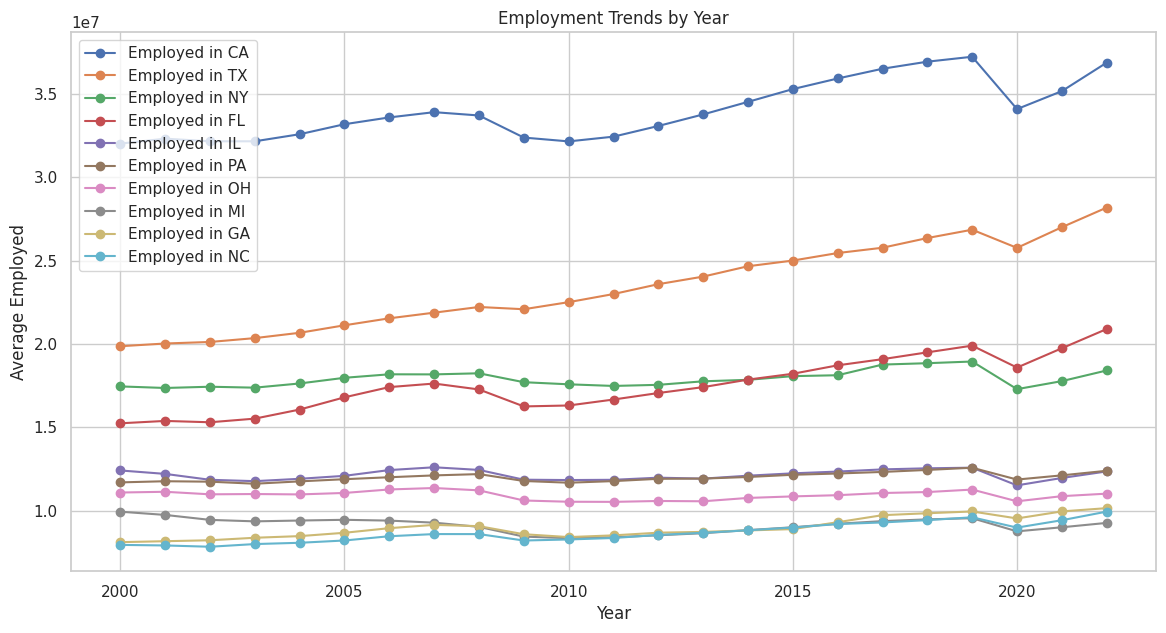

In [34]:
sns.set(style="whitegrid")
# Plotting line graphs for the 10 states with the highest Employment / Построение линейных графиков для 10 штатов с самым высоким Employment
plt.figure(figsize=(14, 7))
for state in top_10_emp_states['State']:
    subset = state_year_avg[state_year_avg['State'] == state]
    plt.plot(subset['Year'], subset['Employed'], marker='o', label=f'Employed in {state}')

plt.title('Employment Trends by Year')
plt.xlabel('Year')
plt.ylabel('Average Employed')
plt.legend(loc='upper left')
plt.show()

In [35]:
state_median_unemployed = state_year_avg.groupby('State')['Unemployed'].median().reset_index()
# Sort results in descending order / Сортировка результатов по убыванию
state_median_unemployed = state_median_unemployed.sort_values(by='Unemployed', ascending=False)
# Selecting the top 10 states with the highest Unemployed / Выбор первых 10 штатов с самым высоким Unemployed
top_10_unemp_states = state_median_unemployed.head(10)
print(top_10_unemp_states)

   State  Unemployed
4     CA   2330117.0
44    TX   1235890.0
34    NY   1039661.0
9     FL    856196.0
14    IL    783730.0
38    PA    688495.0
22    MI    687808.0
35    OH    674805.0
27    NC    503477.0
31    NJ    488963.0


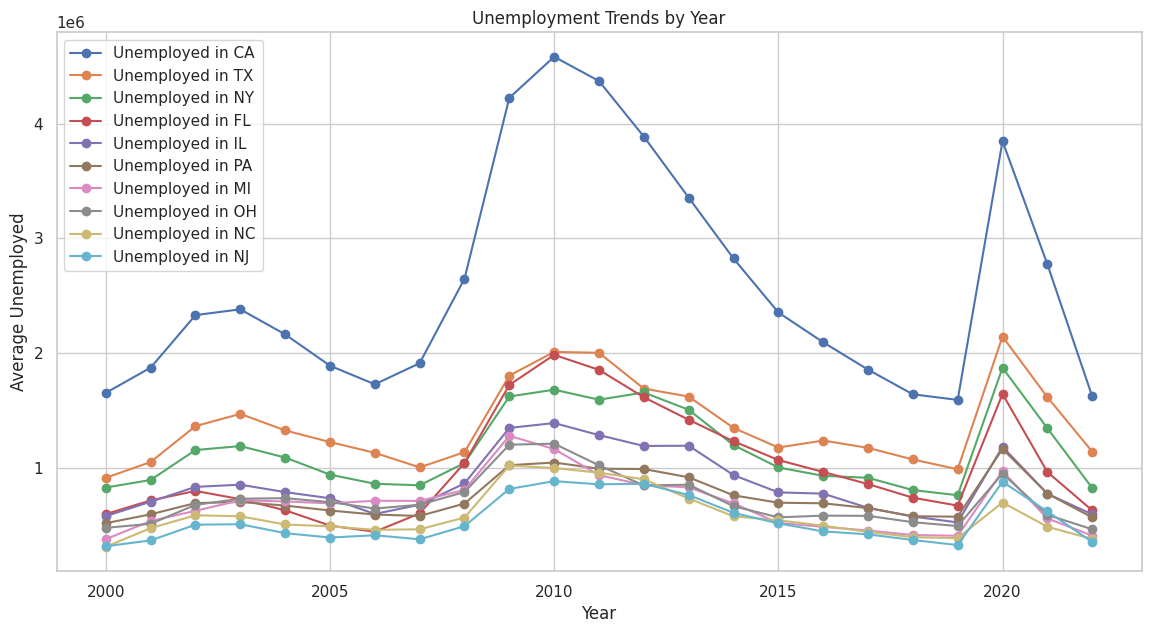

In [36]:
sns.set(style="whitegrid")
# Plotting line graphs for the 10 states with the highest Unemployed / Построение линейных графиков для 10 штатов с самым высоким Unemployed
plt.figure(figsize=(14, 7))
for state in top_10_unemp_states['State']:
    subset = state_year_avg[state_year_avg['State'] == state]
    plt.plot(subset['Year'], subset['Unemployed'], marker='o', label=f'Unemployed in {state}')

plt.title('Unemployment Trends by Year')
plt.xlabel('Year')
plt.ylabel('Average Unemployed')
plt.legend(loc='upper left')
plt.show()

In [37]:
state_median_unemployed_rate = state_year_avg.groupby('State')['Unemployment_rate'].median().reset_index()
# Sort results in descending order / Сортировка результатов по убыванию
state_median_unemployed_rate = state_median_unemployed_rate.sort_values(by='Unemployment_rate', ascending=False)
# Selecting the top 10 states with the highest Unemployment_rate / Выбор первых 10 штатов с самым высоким Unemployment_rate
top_10_unemp_rate_states = state_median_unemployed_rate.head(10)
print(top_10_unemp_rate_states)

   State  Unemployment_rate
39    PR              13.50
0     AK               8.45
22    MI               7.70
25    MS               7.10
4     CA               7.00
41    SC               7.00
7     DC               6.90
37    OR               6.80
18    LA               6.70
48    WA               6.45


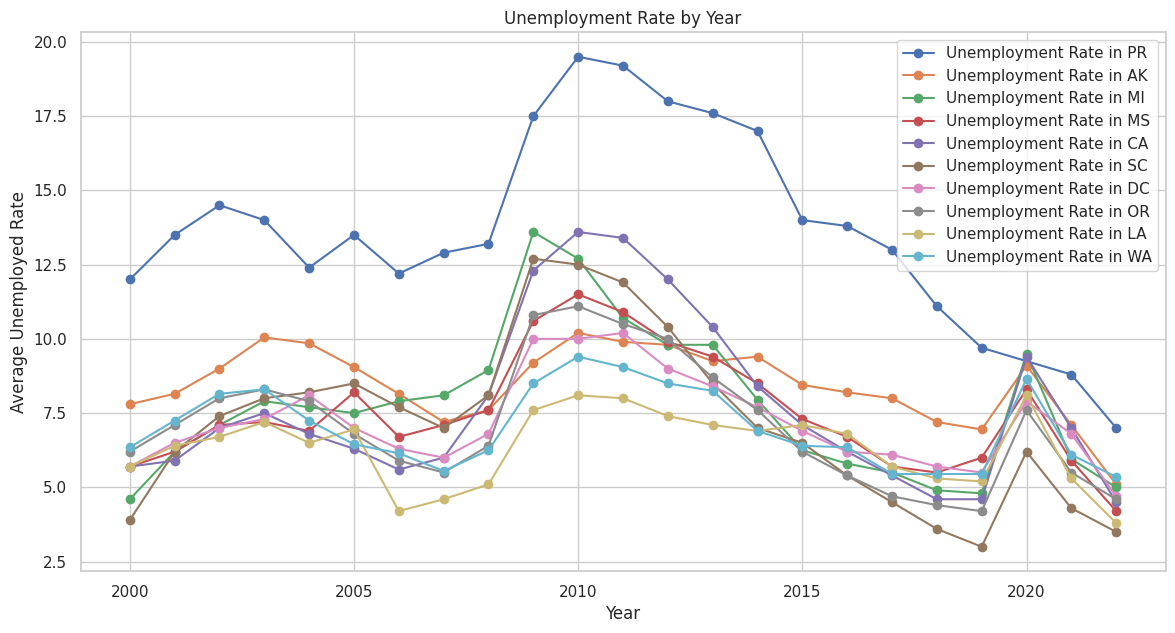

In [38]:
sns.set(style="whitegrid")
# Plotting line graphs for unemployment rates for the TOP 10 states / Построение линейных графиков по уровню безработицы для ТОР10 штатов
plt.figure(figsize=(14, 7))
for state in top_10_unemp_rate_states['State']:
    subset = state_year_avg[state_year_avg['State'] == state]
    plt.plot(subset['Year'], subset['Unemployment_rate'], marker='o', label=f'Unemployment Rate in {state}')

plt.title('Unemployment Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Unemployed Rate')
plt.legend()
plt.show()

In [39]:
state_median_civilian_labor_force = state_year_avg.groupby('State')['Civilian_labor_force'].median().reset_index()
# Sort results in descending order / Сортировка результатов по убыванию
state_median_civilian_labor_force = state_median_civilian_labor_force.sort_values(by='Civilian_labor_force', ascending=False)
# Выбор первых 10 штатов
top_10_clf_states = state_median_civilian_labor_force.head(10)
print(top_10_clf_states)

   State  Civilian_labor_force
4     CA            36813515.0
44    TX            24999210.0
34    NY            19075513.0
9     FL            18520706.0
14    IL            13032760.0
38    PA            12800480.0
35    OH            11639979.0
22    MI             9822503.0
10    GA             9500109.0
27    NC             9315754.0


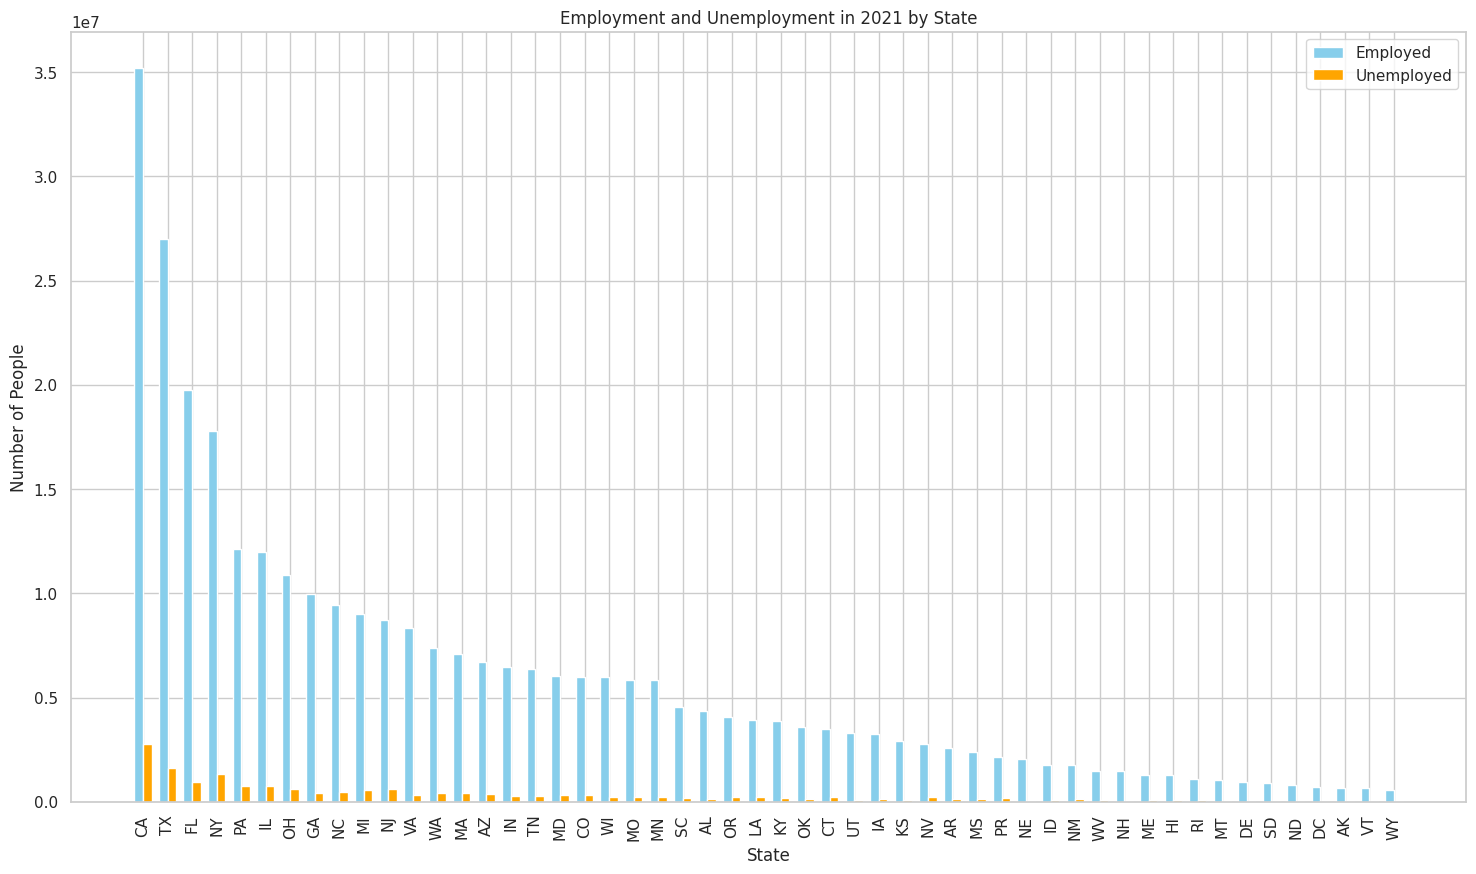

In [41]:
# Building bar charts for employment and unemployment for 2021 / Построение столбчатых диаграмм для занятости и безработицы по 2021
# Data filtering for 2021 / Фильтрация данных для 2021 года
data_2021_sorted_descending = state_year_avg[state_year_avg['Year'] == 2021].sort_values(by='Employed', ascending=False)
# Defining positions for columns on the X axis / Определение позиций для столбцов на оси X
ind = np.arange(len(data_2021_sorted_descending))
width = 0.35
fig, ax = plt.subplots(figsize=(18, 10))
# Columns for Employed / Столбцы для занятости
ax.bar(ind - width/2, data_2021_sorted_descending['Employed'], width, label='Employed', color='skyblue')
# Columns for Unemployed / Столбцы для безработицы
ax.bar(ind + width/2, data_2021_sorted_descending['Unemployed'], width, label='Unemployed', color='orange')
ax.set_title('Employment and Unemployment in 2021 by State')
ax.set_xlabel('State')
ax.set_ylabel('Number of People')
ax.set_xticks(ind)
ax.set_xticklabels(data_2021_sorted_descending['State'], rotation=90)
ax.legend()
plt.show()

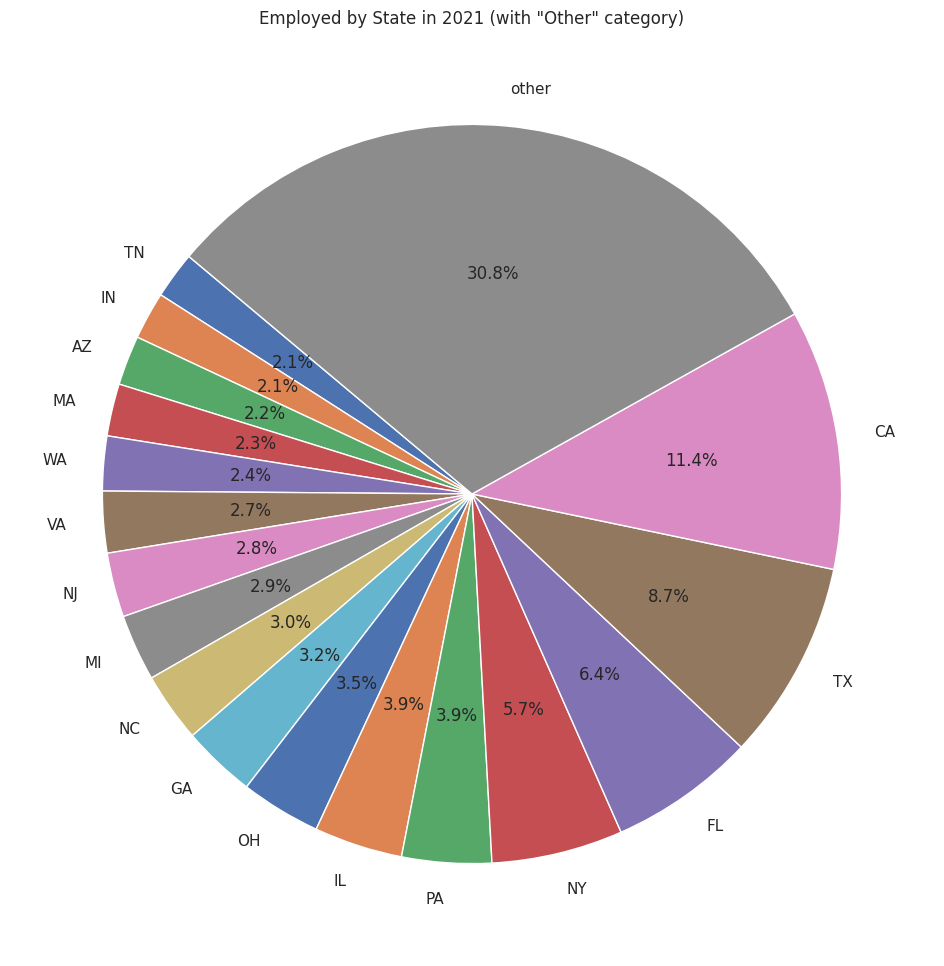

In [42]:
# Sort states by Employed / Сортировка штатов по занятости Employed
sorted_emp_data_2021 = state_year_avg[state_year_avg['Year'] == 2021].sort_values(['Employed'])
# Setting a threshold for defining small categories, this is 2% of the total number of employees / Установка порога для определения малых категорий, это 2% от общего числа занятых
threshold = sorted_emp_data_2021['Employed'].sum() * 0.02

# Division into two groups: more than the threshold and less than the threshold / Разделение на две группы: больше порога и меньше порога
other = sorted_emp_data_2021[sorted_emp_data_2021['Employed'] < threshold]
top_emp_states_2021 = sorted_emp_data_2021[sorted_emp_data_2021['Employed'] >= threshold]
top_emp_states_2021 = pd.DataFrame(top_emp_states_2021)
# Sum values for states below threshold / Суммирование значений для штатов ниже порога
other_sum = other['Employed'].sum()
# Creating a DataFrame for "Others" / Создание DataFrame для "Другие"
other_df = pd.DataFrame({'State': ['other'], 'Employed': [other_sum]})
# Concatenation of top_emp_states_2021 and other_df / Конкатенация top_emp_states_2021 и other_df
top_emp_states_2021 = pd.concat([top_emp_states_2021, other_df], ignore_index=True)
#'State' is a column, not part of an index / 'State' - это столбец, а не часть индекса
top_emp_states_2021 = top_emp_states_2021[['State', 'Employed']]

# Building a pie chart for the top states and the "Other" group / Построение круговой диаграммы для топ штатов и группы "Другие"
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(top_emp_states_2021['Employed'], labels=top_emp_states_2021['State'], autopct='%1.1f%%', startangle=140)
ax.set_title('Employed by State in 2021 (with "Other" category)')
plt.show()

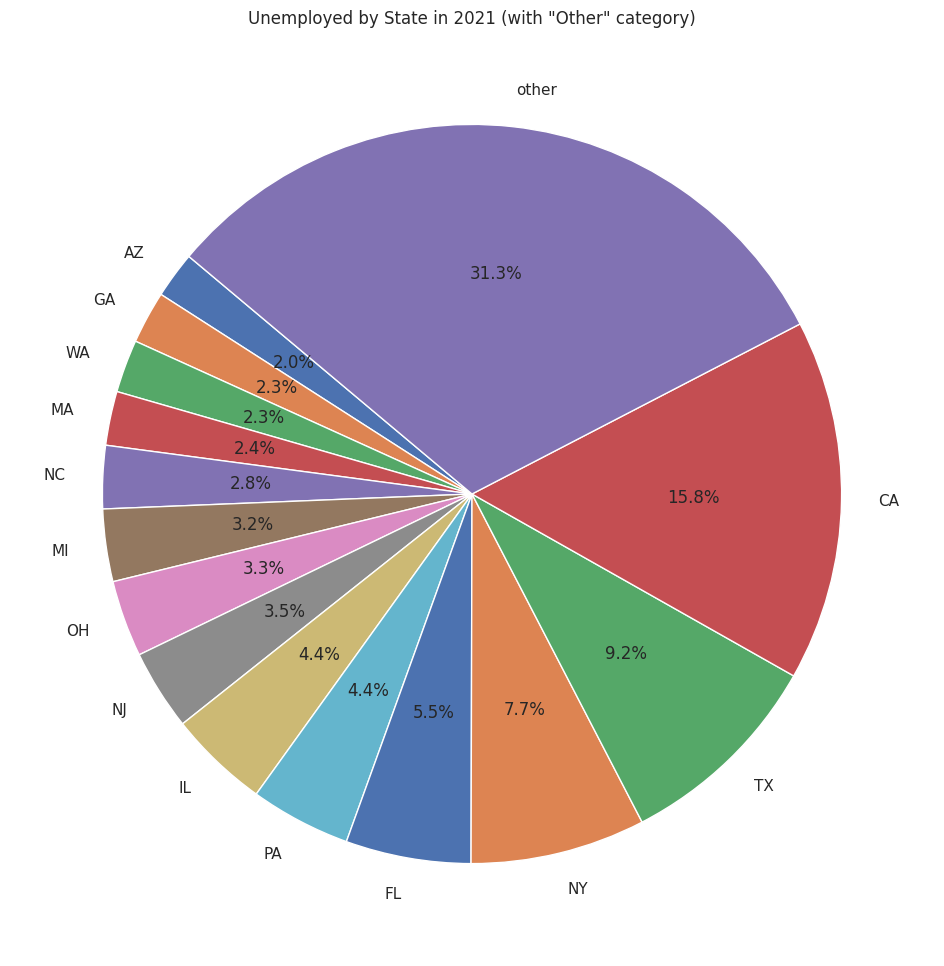

In [43]:
# Sort states by Unemployed / Сортировка штатов по безработице Unemployed
sorted_unemp_data_2021 = state_year_avg[state_year_avg['Year'] == 2021].sort_values(['Unemployed'])
# Setting a threshold for defining small categories, this is 2% of the total number of Unemployed / Установка порога для определения малых категорий, это 2% от общего числа безработных
threshold = sorted_unemp_data_2021['Unemployed'].sum() * 0.02
# Division into two groups: more than the threshold and less than the threshold / Разделение на две группы: больше порога и меньше порога
other = sorted_unemp_data_2021[sorted_unemp_data_2021['Unemployed'] < threshold]
top_unemp_states_2021 = sorted_unemp_data_2021[sorted_unemp_data_2021['Unemployed'] >= threshold]
top_unemp_states_2021 = pd.DataFrame(top_unemp_states_2021)
# Sum values for states below threshold / Суммирование значений для штатов ниже порога
other_sum = other['Unemployed'].sum()
# Creating a DataFrame for "Others" / Создание DataFrame для "Другие"
other_df = pd.DataFrame({'State': ['other'], 'Unemployed': [other_sum]})
# Concatenation of top_unemp_states_2021 and other_df / Конкатенация top_unemp_states_2021 и other_df
top_unemp_states_2021 = pd.concat([top_unemp_states_2021, other_df], ignore_index=True)
# 'State' is a column, not part of an index / 'State' - это столбец, а не часть индекса
top_unemp_states_2021 = top_unemp_states_2021[['State', 'Unemployed']]

# Building a pie chart for the top states and the "Other" group / Построение круговой диаграммы для топ штатов и группы "Другие"
fig, ax = plt.subplots(figsize=(12, 12))
ax.pie(top_unemp_states_2021['Unemployed'], labels=top_unemp_states_2021['State'], autopct='%1.1f%%', startangle=140)
ax.set_title('Unemployed by State in 2021 (with "Other" category)')
plt.show()

In [44]:
pivot_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75146 entries, 0 to 75145
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FIPS_Code                             75146 non-null  int64  
 1   State                                 75146 non-null  object 
 2   Area_Name                             75146 non-null  object 
 3   Year                                  75146 non-null  int64  
 4   Civilian_labor_force                  75146 non-null  float64
 5   Employed                              75146 non-null  float64
 6   Med_HH_Income_Percent_of_State_Total  75146 non-null  float64
 7   Median_Household_Income               75146 non-null  float64
 8   Unemployed                            75146 non-null  float64
 9   Unemployment_rate                     75146 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 5.7+ MB


In [45]:
# Filtering data for 2021 / Фильтрация данных за 2021 год
pivot_df3_2021 = pivot_df3[pivot_df3['Year'] == 2021]
# Sort data by column 'Med_HH_Income_Percent_of_State_Total' in descending order / Сортировка данных по столбцу 'Med_HH_Income_Percent_of_State_Total' в убывающем порядке
top_counties = pivot_df3_2021.sort_values(by='Med_HH_Income_Percent_of_State_Total', ascending=False)
# Top 20 counties / Tоп-20 округов
top_20_counties = top_counties.head(20)
top_20_counties

Base Attribute Name,FIPS_Code,State,Area_Name,Year,Civilian_labor_force,Employed,Med_HH_Income_Percent_of_State_Total,Median_Household_Income,Unemployed,Unemployment_rate
42356,35028,NM,"Los Alamos County, NM",2021,10021.0,9698.0,246.9,134050.0,323.0,3.2
58962,47187,TN,"Williamson County, TN",2021,133584.0,130048.0,206.8,123474.0,3536.0,2.6
25373,21185,KY,"Oldham County, KY",2021,32956.0,31833.0,196.6,109181.0,1123.0,3.4
48267,39041,OH,"Delaware County, OH",2021,114332.0,110170.0,190.5,118661.0,4162.0,3.6
67127,51107,VA,"Loudoun County, VA",2021,225653.0,218649.0,189.9,153716.0,7004.0,3.1
10492,13117,GA,"Forsyth County, GA",2021,127280.0,124100.0,181.8,120919.0,3180.0,2.5
63585,48397,TX,"Rockwall County, TX",2021,56857.0,54381.0,180.3,120696.0,2476.0,4.4
68346,51610,VA,"Falls Church city, VA",2021,8308.0,8086.0,176.0,142430.0,222.0,2.7
61009,48173,TX,"Glasscock County, TX",2021,818.0,793.0,174.7,116958.0,25.0,3.1
17024,18057,IN,"Hamilton County, IN",2021,190416.0,185827.0,172.5,108203.0,4589.0,2.4


<ipython-input-46-e01abd616cbd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area_Name', y='Med_HH_Income_Percent_of_State_Total', data=top_20_counties, palette='Spectral')


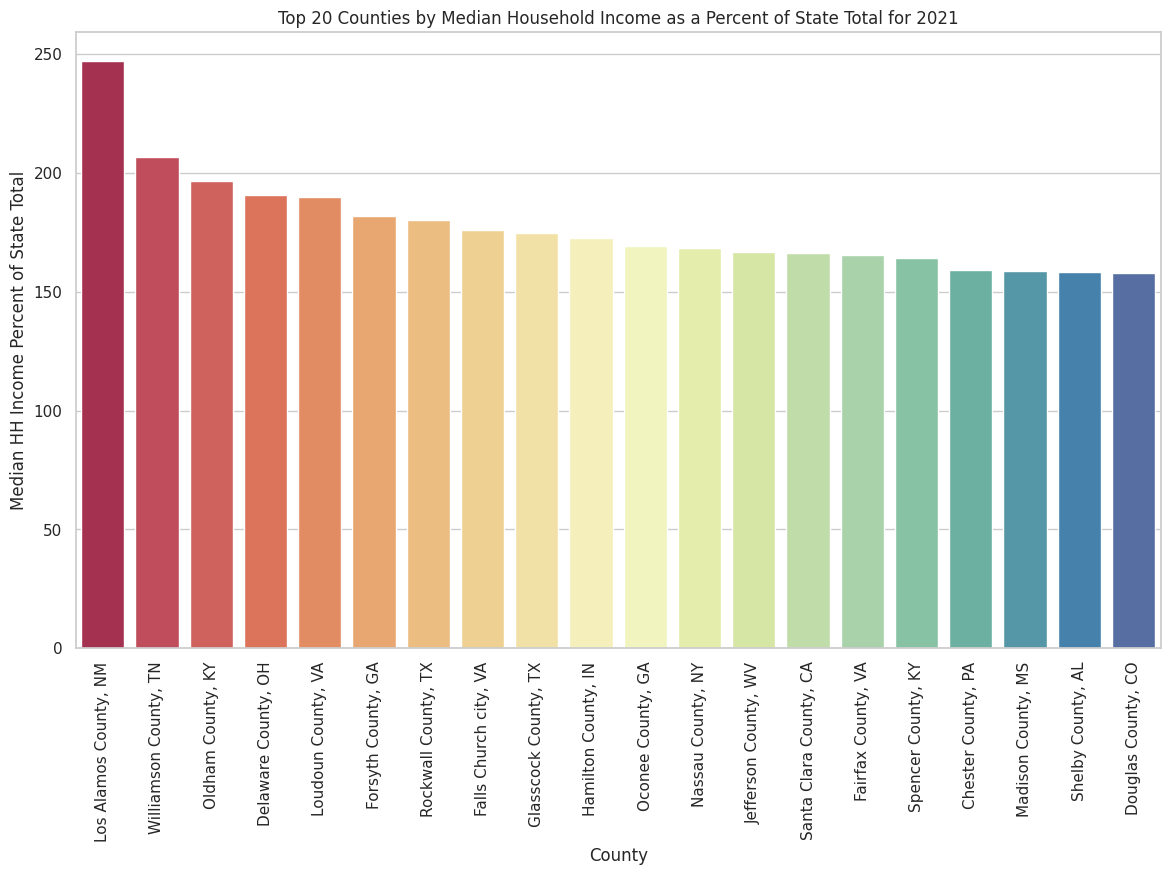

In [46]:
# Building a bar chart for the top 20 counties / Построение столбчатой диаграммы для топ-20 округов
plt.figure(figsize=(14, 8))
sns.barplot(x='Area_Name', y='Med_HH_Income_Percent_of_State_Total', data=top_20_counties, palette='Spectral')
plt.title('Top 20 Counties by Median Household Income as a Percent of State Total for 2021')
plt.xlabel('County')
plt.ylabel('Median HH Income Percent of State Total')
plt.xticks(rotation=90)
plt.show()

These TOP 20 Counties are the outliers with the highest Med_HH_Income_Percent_of_State_Total and to analyze them, several steps can be taken to investigate the possible reasons for this situation. Here are the approaches you can use:

**Context Analysis:** The economic, social and geographic characteristics of these counties can be examined. This may include industrial and economic profile, income distribution, educational attainment, access and quality of healthcare and housing.

**Comparison with the Unemployment Rate:** You can check how the unemployment rate correlates with the median income in these counties. High incomes can be associated with low unemployment, which is typical for economically prosperous regions.

**Comparison with other economic indicators:** Other economic indicators may be considered, such as the cost of living, employment rates in high-wage industries (eg, IT, finance, pharmaceuticals), and the presence of large corporations or high-tech enterprises.

**Demographic Analysis:** Analyze demographic data such as age, ethnicity, education level, and migration trends. For example, some counties may attract young professionals or have a high concentration of college graduates.

**Tax and Policy Analysis:** Examine tax policies and government incentives that can affect household incomes. Some counties may offer attractive tax incentives that promote economic growth and increase residents' incomes.

**Historical and Cultural Context:** Consider historical and cultural aspects that may contribute to the economic prosperity of certain counties.

**Statistical Analysis:** Use statistical techniques such as clustering or multiple regression analysis to determine relationships between various variables and identify possible factors that may explain the high incomes in these counties.

To analyze the possible relationship between the unemployment rate and median income in the top 20 counties, we first calculate the correlation between these two variables. The correlation will help you determine whether there is a linear relationship between the unemployment rate and median household income.

Эти TOP 20 Counties это выбросы с самым высоким значением Med_HH_Income_Percent_of_State_Total и чтобы их проанализировать можно выполнить несколько шагов для исследования возможных причин такого положения. Вот подходы, которые вы можно использовать:

**Анализ контекста:** Можно исследовать экономические, социальные и географические особенности этих округов. Это может включать промышленный и экономический профиль, распределение доходов, уровень образования, доступность и качество здравоохранения и жилья.

**Сравнение с уровнем безработицы**: Можно проверить, как уровень безработицы коррелирует с медианным доходом в этих округах. Высокие доходы могут быть связаны с низкой безработицей, что характерно для экономически процветающих регионов.

**Сравнение с другими экономическими показателями:** Можно рассмотреть другие экономические показатели, такие как стоимость жизни, уровень занятости в высокооплачиваемых отраслях (например, IT, финансы, фармацевтика) и присутствие крупных корпораций или высокотехнологичных предприятий.

**Демографический анализ:** Проанализировать демографические данные, такие как возраст, этническая принадлежность, уровень образования и миграционные тенденции. Например, некоторые округа могут привлекать молодых профессионалов или иметь высокую концентрацию выпускников высших учебных заведений.

**Анализ налогов и политики:** Изучить налоговую политику и государственные льготы, которые могут влиять на доходы домохозяйств. Некоторые округа могут предлагать привлекательные налоговые стимулы, которые способствуют экономическому росту и повышают доходы жителей.

**Исторический и культурный контекст:** Учитывайте исторические и культурные аспекты, которые могут способствовать экономическому процветанию определенных округов.

**Статистический анализ:** Использовать статистические методы, такие как кластеризация или множественный регрессионный анализ, чтобы определить взаимосвязи между различными переменными и выявить возможные факторы, которые могут объяснить высокие доходы в этих округах.


Для анализа возможной связи между уровнем безработицы и медианным доходом в топ-20 округах, сначала рассчитаем корреляцию между этими двумя переменными. Корреляция поможет вам определить, есть ли линейная зависимость между уровнем безработицы и медианным доходом домохозяйств.

In [47]:
# Correlation calculation between unemployment rate and median income in top 20 counties/ Расчет корреляции
correlation = top_20_counties['Unemployment_rate'].corr(top_20_counties['Med_HH_Income_Percent_of_State_Total'])
print(f"Correlation between unemployment rate and median income in top 20 counties: {correlation}")

Correlation between unemployment rate and median income in top 20 counties: -0.21366848557683366


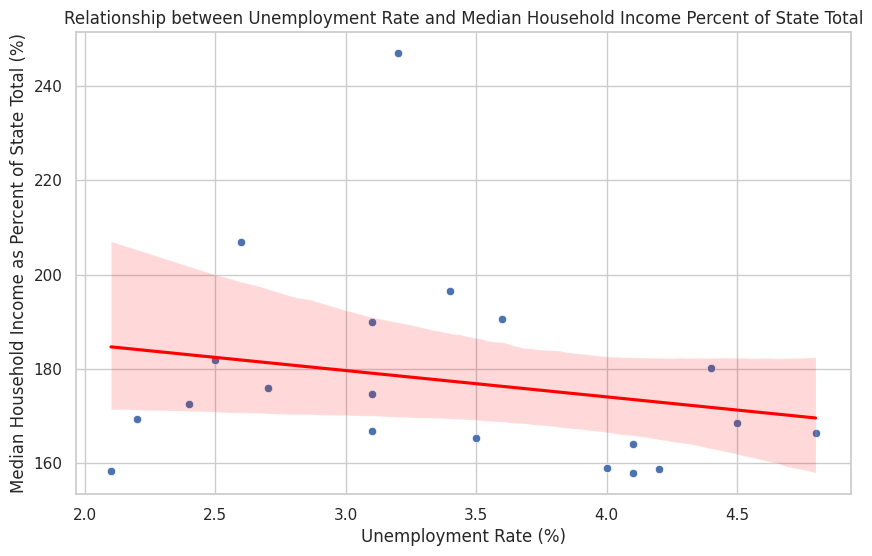

In [48]:
# Visualization of the relationship between unemployment rates and median income in the top 20 counties / Визуализация взаимосвязи между уровнем безработицы и медианным доходом в топ-20 округах
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment_rate', y='Med_HH_Income_Percent_of_State_Total', data=top_20_counties)
# Adding a trend line / Добавление линии тренда
sns.regplot(x='Unemployment_rate', y='Med_HH_Income_Percent_of_State_Total', data=top_20_counties, scatter=False, color='red')
plt.title('Relationship between Unemployment Rate and Median Household Income Percent of State Total')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Median Household Income as Percent of State Total (%)')
plt.show()

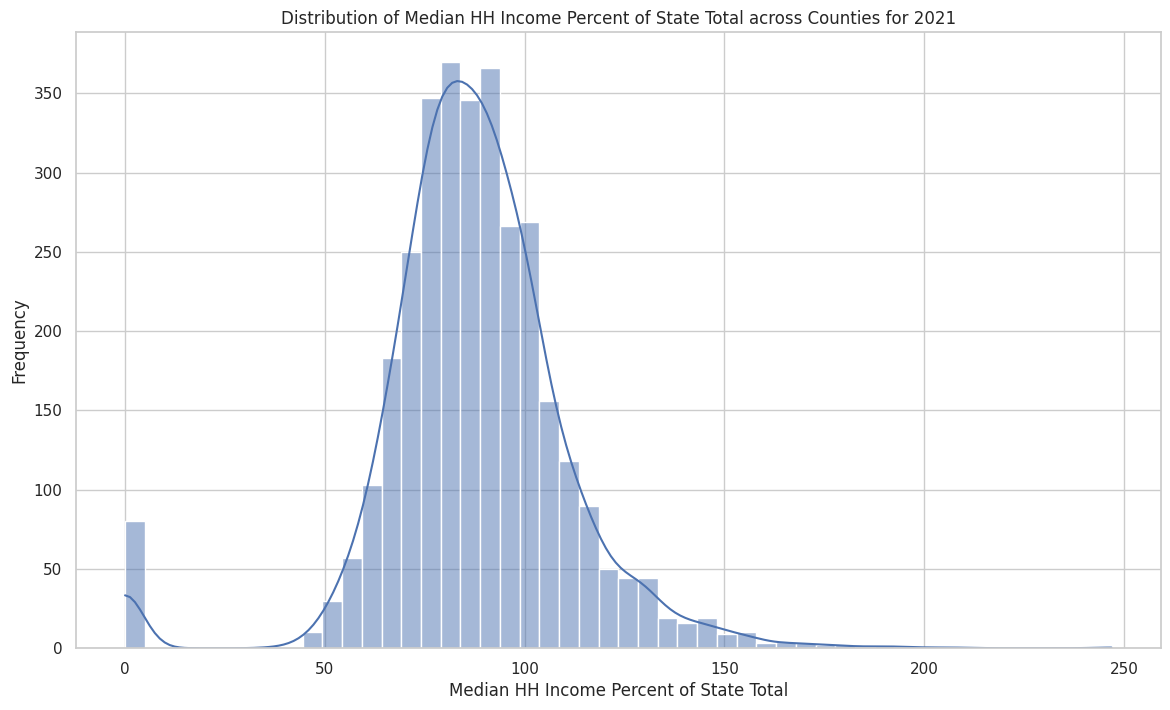

In [49]:
# Building a histogram / Построение гистограммы
plt.figure(figsize=(14, 8))
sns.histplot(pivot_df3_2021['Med_HH_Income_Percent_of_State_Total'], bins=50, kde=True)
plt.title('Distribution of Median HH Income Percent of State Total across Counties for 2021')
plt.xlabel('Median HH Income Percent of State Total')
plt.ylabel('Frequency')
plt.show()

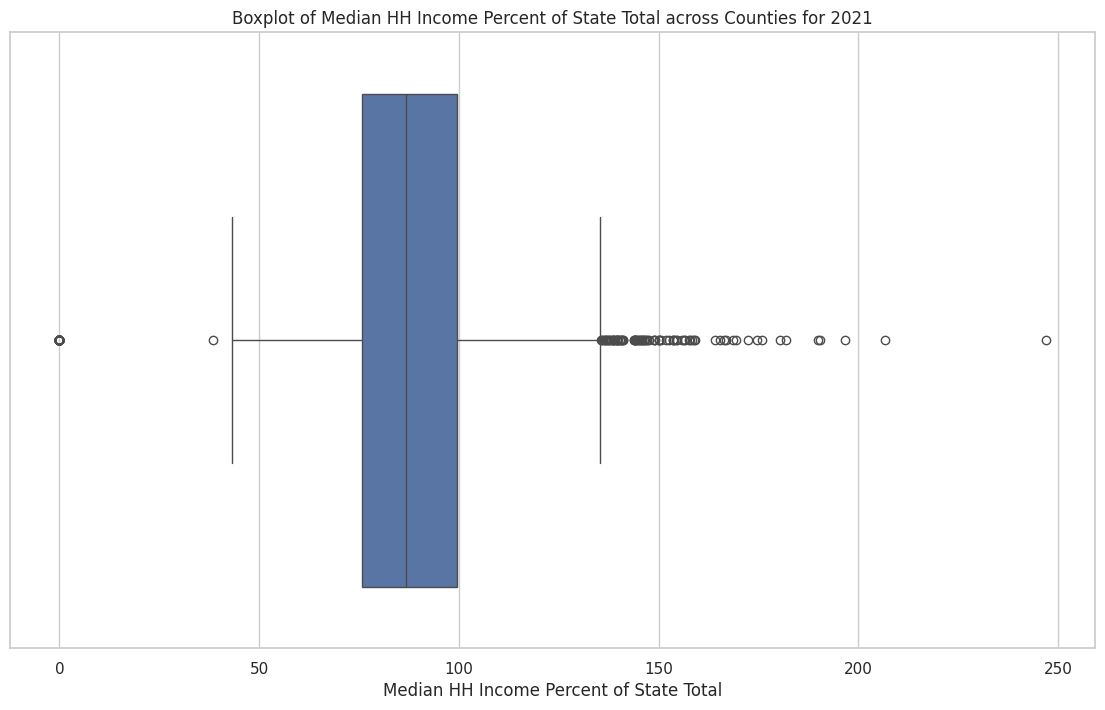

In [50]:
# Building a boxplot / Построение ящика с усами
plt.figure(figsize=(14, 8))
sns.boxplot(x=pivot_df3_2021['Med_HH_Income_Percent_of_State_Total'])
plt.title('Boxplot of Median HH Income Percent of State Total across Counties for 2021')
plt.xlabel('Median HH Income Percent of State Total')
plt.show()

In [51]:
pivot_df3_2021['Med_HH_Income_Percent_of_State_Total'].describe()

count    3273.000000
mean       87.349618
std        23.821580
min         0.000000
25%        75.700000
50%        86.700000
75%        99.600000
max       246.900000
Name: Med_HH_Income_Percent_of_State_Total, dtype: float64

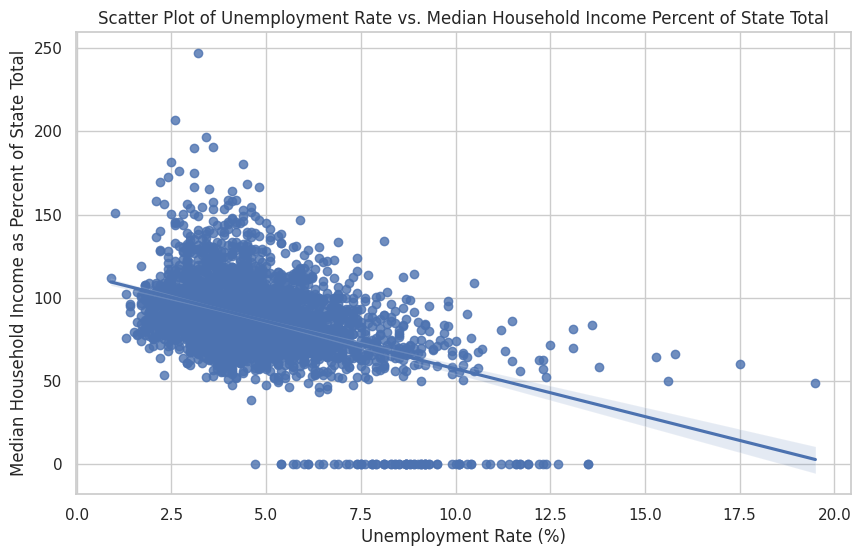

In [52]:
# Building a scatter plot with a trend line / Построение scatter plot с линией тренда
plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment_rate', y='Med_HH_Income_Percent_of_State_Total', data=pivot_df3_2021, fit_reg=True)
plt.title('Scatter Plot of Unemployment Rate vs. Median Household Income Percent of State Total')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Median Household Income as Percent of State Total')
plt.show()

In the loaded scatterplot, each point represents a different county. The x-axis is the unemployment rate, and the y-axis is the median household income as a percentage of the state median income. The trend line (blue line on the graph) shows the overall trend in the data.

From this graph, several observations can be made:

**Trend:** There is a general downward trend, meaning that as the unemployment rate increases, median household income as a percentage of state median income generally decreases. This may indicate that counties with higher unemployment tend to have lower median household income. **Scattered data:** The dots are widely scattered, especially at the bottom of the graph, showing significant variability in median household incomes between different counties with relatively low unemployment rates. **Outliers:** The graph shows potential outliers, especially at the top of the graph, where counties have significantly higher median incomes compared to the state average. This may indicate that there are counties with particularly high income levels.

На загруженной диаграмме рассеяния каждая точка представляет отдельный округ (county). По оси X отложен процент безработицы, а по оси Y — медианный доход домохозяйств как процент от среднего дохода по штату. Линия тренда (синяя линия на графике) показывает общую тенденцию в данных.

Исходя из этого графика, можно сделать несколько наблюдений:

**Тренд:** Существует общий нисходящий тренд, что означает, что с увеличением процента безработицы обычно уменьшается медианный доход домохозяйств в процентах от медианного дохода по штату. Это может указывать на то, что в округах с более высокой безработицей медианный доход домохозяйств обычно ниже.
**Разброс данных:** Точки сильно рассеяны, особенно в нижней части графика, что показывает значительную вариативность медианных доходов домохозяйств между различными округами при сравнительно низком уровне безработицы.
**Выбросы:** На графике видны потенциальные выбросы, особенно в верхней части графика, где округа имеют значительно выше медианный доход по сравнению со средним по штату. Это может указывать на наличие округов с особенно высоким уровнем дохода.

In [53]:
heatmap_data_ur = state_year_avg.pivot_table(index='Year', columns='State', values=['Unemployment_rate'], aggfunc='mean')

In [54]:
# Check the MultiIndex structure / Проверьте структуру MultiIndex
print(heatmap_data_ur.columns)

MultiIndex([('Unemployment_rate', 'AK'),
            ('Unemployment_rate', 'AL'),
            ('Unemployment_rate', 'AR'),
            ('Unemployment_rate', 'AZ'),
            ('Unemployment_rate', 'CA'),
            ('Unemployment_rate', 'CO'),
            ('Unemployment_rate', 'CT'),
            ('Unemployment_rate', 'DC'),
            ('Unemployment_rate', 'DE'),
            ('Unemployment_rate', 'FL'),
            ('Unemployment_rate', 'GA'),
            ('Unemployment_rate', 'HI'),
            ('Unemployment_rate', 'IA'),
            ('Unemployment_rate', 'ID'),
            ('Unemployment_rate', 'IL'),
            ('Unemployment_rate', 'IN'),
            ('Unemployment_rate', 'KS'),
            ('Unemployment_rate', 'KY'),
            ('Unemployment_rate', 'LA'),
            ('Unemployment_rate', 'MA'),
            ('Unemployment_rate', 'MD'),
            ('Unemployment_rate', 'ME'),
            ('Unemployment_rate', 'MI'),
            ('Unemployment_rate', 'MN'),
            ('Un

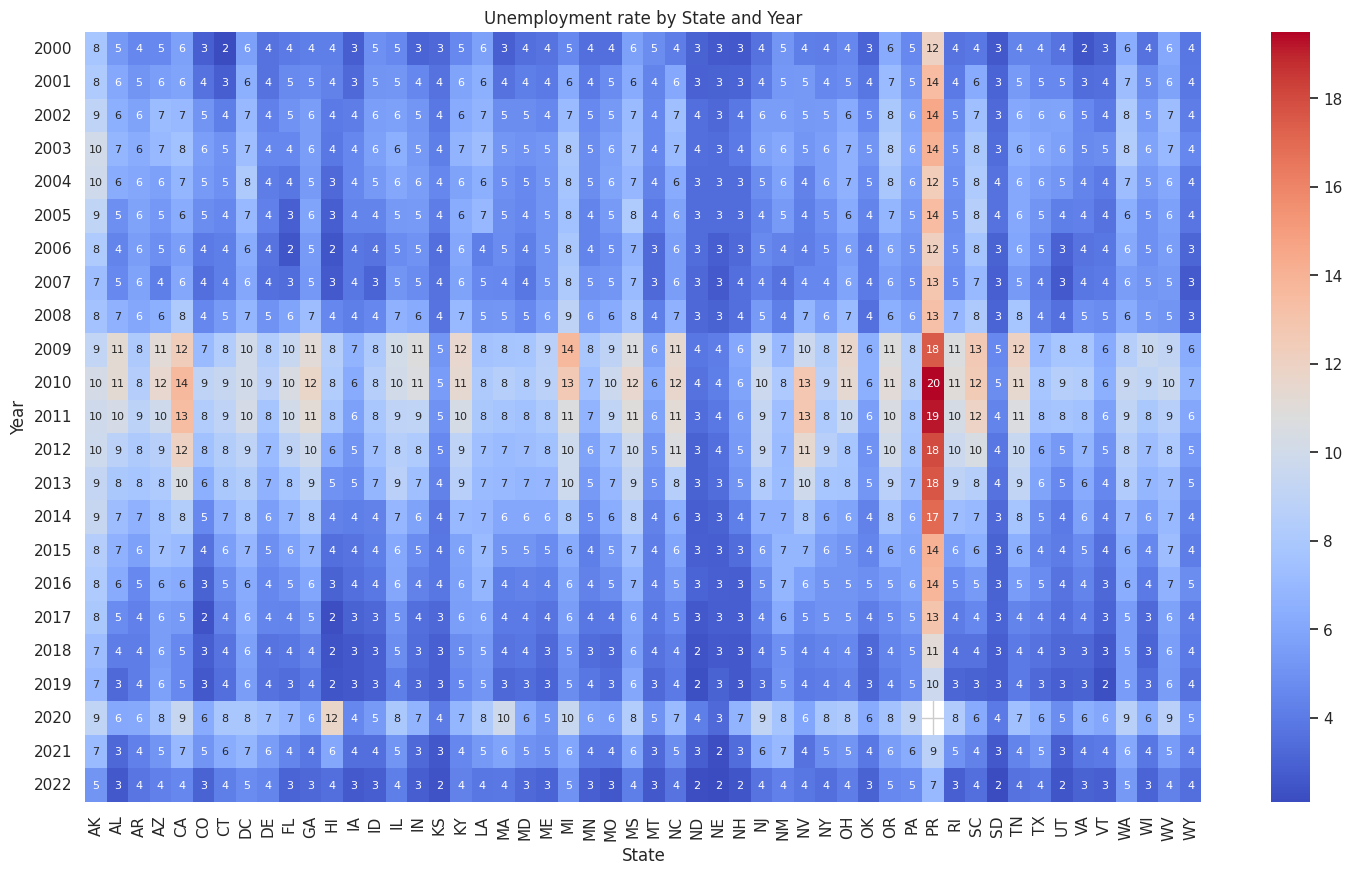

In [55]:
# Retrieving the first element from each tuple in the MultiIndex to use as new column labels
# Извлекаем первый элемент из каждого кортежа в MultiIndex для использования в качестве новых меток столбцов
new_columns = [col[1] for col in heatmap_data_ur.columns]
# Resetting Column Labels / Переустановка меток столбцов
heatmap_data_ur.columns = new_columns
# Displaying a heat map with new X-axis labels / Отображение тепловой карты с новыми метками оси X
plt.figure(figsize=(18, 10))
sns.heatmap(heatmap_data_ur, annot=True, cmap='coolwarm', fmt=".0f", annot_kws={'size': 8},
            xticklabels=new_columns)
plt.title('Unemployment rate by State and Year')
plt.ylabel('Year')
plt.xlabel('State')
plt.show()

In [56]:
# Merged with df2 / Слияние с df2
df2 = df2.merge(pivot_df3, left_on=['FIPS County Code', 'Fiscal Year'], right_on=['FIPS_Code', 'Year'], how='inner')
# Clearing the final DataFrame / Очистка итогового DataFrame
df2.drop(['FIPS_Code', 'Year'], axis=1, inplace=True)
print(df2.head())

   Fiscal Year     County  FIPS County Code  Computed Tax State  \
0         2012      Adair             19001     3388812.0    IA   
1         2012      Adams             19003     1559340.0    IA   
2         2012  Allamakee             19005     5648573.0    IA   
3         2012  Appanoose             19007     5976384.0    IA   
4         2012    Audubon             19009     2051058.0    IA   

              Area_Name  Civilian_labor_force  Employed  \
0      Adair County, IA                4064.0    3885.0   
1      Adams County, IA                2191.0    2104.0   
2  Allamakee County, IA                7626.0    7133.0   
3  Appanoose County, IA                6013.0    5619.0   
4    Audubon County, IA                3229.0    3074.0   

   Med_HH_Income_Percent_of_State_Total  Median_Household_Income  Unemployed  \
0                                   0.0                      0.0       179.0   
1                                   0.0                      0.0        87.0   
2 

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Fiscal Year                           1089 non-null   int64  
 1   County                                1089 non-null   object 
 2   FIPS County Code                      1089 non-null   int64  
 3   Computed Tax                          1089 non-null   float64
 4   State                                 1089 non-null   object 
 5   Area_Name                             1089 non-null   object 
 6   Civilian_labor_force                  1089 non-null   float64
 7   Employed                              1089 non-null   float64
 8   Med_HH_Income_Percent_of_State_Total  1089 non-null   float64
 9   Median_Household_Income               1089 non-null   float64
 10  Unemployed                            1089 non-null   float64
 11  Unemployment_rate

In [58]:
df2['Fiscal Year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [59]:
df2['County'].unique()

array(['Adair', 'Adams', 'Allamakee', 'Appanoose', 'Audubon', 'Benton',
       'Black Hawk', 'Boone', 'Bremer', 'Buchanan', 'Buena Vista',
       'Butler', 'Calhoun', 'Carroll', 'Cass', 'Cedar', 'Cerro Gordo',
       'Cherokee', 'Chickasaw', 'Clarke', 'Clay', 'Clayton', 'Clinton',
       'Crawford', 'Dallas', 'Davis', 'Decatur', 'Delaware', 'Des Moines',
       'Dickinson', 'Dubuque', 'Emmet', 'Fayette', 'Floyd', 'Franklin',
       'Fremont', 'Greene', 'Grundy', 'Guthrie', 'Hamilton', 'Hancock',
       'Hardin', 'Harrison', 'Henry', 'Howard', 'Humboldt', 'Ida', 'Iowa',
       'Jackson', 'Jasper', 'Jefferson', 'Johnson', 'Jones', 'Keokuk',
       'Kossuth', 'Lee', 'Linn', 'Louisa', 'Lucas', 'Lyon', 'Madison',
       'Mahaska', 'Marion', 'Marshall', 'Mills', 'Mitchell', 'Monona',
       'Monroe', 'Montgomery', 'Muscatine', "O'Brien", 'Osceola', 'Page',
       'Palo Alto', 'Plymouth', 'Pocahontas', 'Polk', 'Pottawattamie',
       'Poweshiek', 'Ringgold', 'Sac', 'Scott', 'Shelby', 'Sioux',

In [60]:
df2['State'].unique()

array(['IA'], dtype=object)

In [61]:
# Calculate the correlation between tax collections and employment levels in IA / Рассчитать корреляцию между налоговыми сборами и уровнем занятости в IA
correlation_tax_employed = df2['Computed Tax'].corr(df2['Employed'])
print(f"Correlation between tax revenues and employment levels: {correlation_tax_employed}")

Correlation between tax revenues and employment levels: 0.961136884681156


*The correlation between tax collections and employment levels of 0.961136884681156 is very high and indicates a strong positive relationship between the two. This means that counties with higher employment levels tend to have higher tax revenues, which makes sense since more people employed can lead to more taxable economic activity.*

Корреляция между налоговыми сборами и уровнем занятости в 0.961136884681156 является очень высокой и указывает на сильную положительную связь между этими двумя показателями. Это означает, что округа с более высоким уровнем занятости обычно имеют более высокие налоговые сборы, что логично, так как большее количество занятых людей может вести к большему объему облагаемой налогом экономической активности.

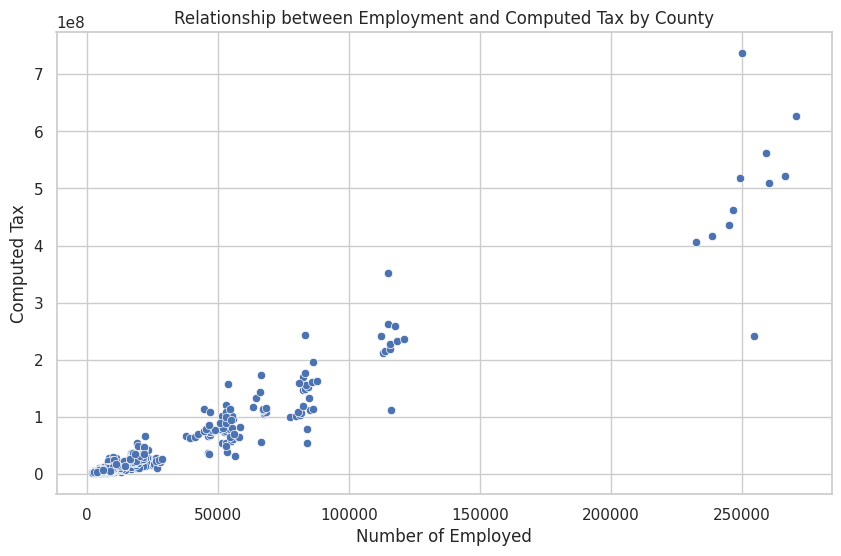

In [62]:
# Scatter plot for taxes and employment / Scatter plot для налоговых сборов и занятости
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Employed', y='Computed Tax', data=df2)
plt.title('Relationship between Employment and Computed Tax by County')
plt.xlabel('Number of Employed')
plt.ylabel('Computed Tax')
plt.show()

In [63]:
# Calculation of quartiles for tax collections / Вычисление квартилей для налоговых сборов
computed_tax_quartiles = df2['Computed Tax'].quantile([0.25, 0.5, 0.75])
# Function for determining quartile / Функция для определения квартиля
def get_quartile(x, quartiles):
    if x <= quartiles[0.25]:
        return '1st Quartile'
    elif x <= quartiles[0.5]:
        return '2nd Quartile'
    elif x <= quartiles[0.75]:
        return '3rd Quartile'
    else:
        return '4th Quartile'

# Creating a new variable for quartiles / Создание новой переменной для квартилей
df2['Tax Quartile'] = df2['Computed Tax'].apply(lambda x: get_quartile(x, computed_tax_quartiles))
# Grouping data by tax quartiles and calculating averages / Группировка данных по квартилям налоговых сборов и расчет средних значений
quartile_comparison = df2.groupby('Tax Quartile').agg({
    'Unemployment_rate': 'median',
    'Employed': 'sum',
}).reset_index()

quartile_comparison

,Tax Quartile,Unemployment_rate,Employed
0,1st Quartile,3.3,1233681.0
1,2nd Quartile,3.5,1777289.0
2,3rd Quartile,3.6,2752981.0
3,4th Quartile,3.6,12209372.0


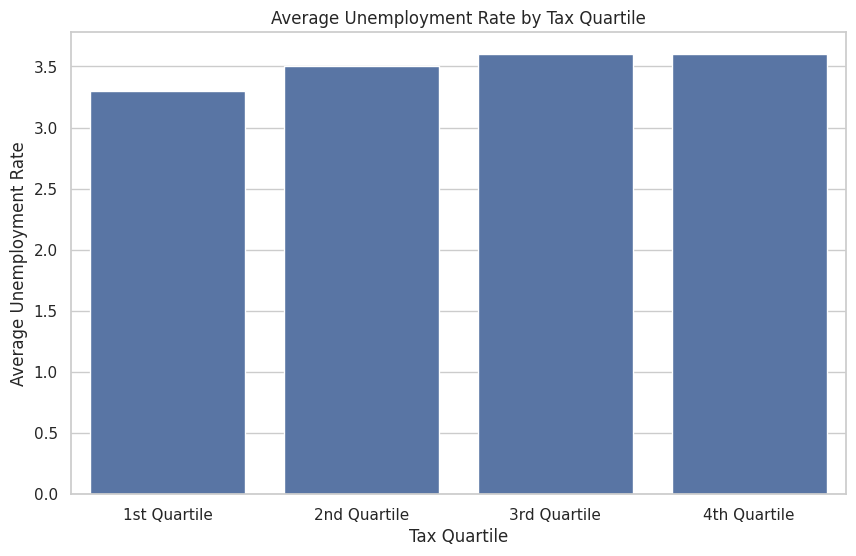

In [64]:
# Visualization of unemployment rate comparison by quartiles / Визуализация сравнения уровня безработицы по квартилям
plt.figure(figsize=(10, 6))
sns.barplot(x='Tax Quartile', y='Unemployment_rate', data=quartile_comparison)
plt.title('Average Unemployment Rate by Tax Quartile')
plt.xlabel('Tax Quartile')
plt.ylabel('Average Unemployment Rate')
plt.show()

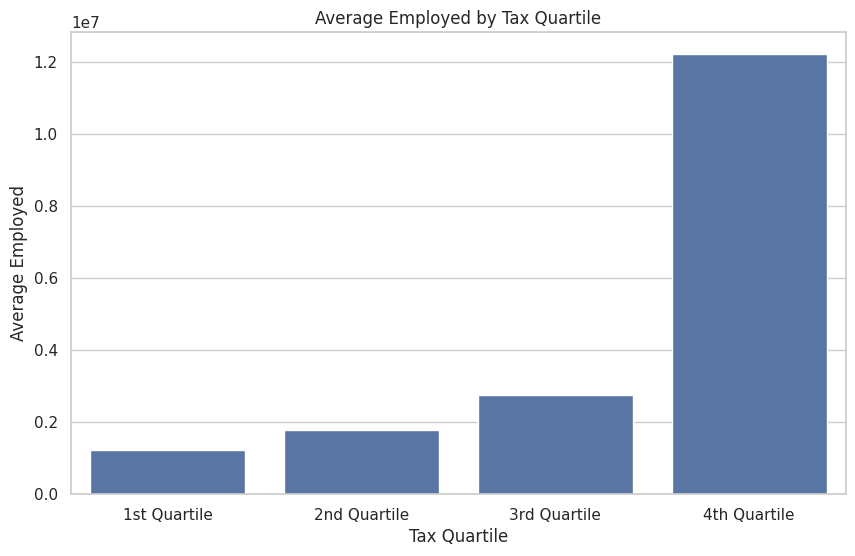

In [65]:
# Visualization of comparison of the number of employees by quartiles / Визуализация сравнения количества работающих по квартилям
plt.figure(figsize=(10, 6))
sns.barplot(x='Tax Quartile', y='Employed', data=quartile_comparison)
plt.title('Average Employed by Tax Quartile')
plt.xlabel('Tax Quartile')
plt.ylabel('Average Employed')
plt.show()

The data shows the average number of people employed and the unemployment rate divided by tax collection quartiles:

**1st quartile:** The lowest level of tax collections is accompanied by a relatively low average number of employees (1,063,083) and a low unemployment rate (3.3%).

**2nd quartile:** Tax collections are moderate, the average number of people employed rises to 1,804,765, and the unemployment rate is slightly higher at 3.5%.

**3rd quartile:** Above average tax collections, employment continues to rise to 2,772,845, unemployment rate rises slightly to 3.6%.

**4th quartile:** Highest tax collections, significantly higher average number of people employed (12,332,630) and highest unemployment rate (3.7%).

This data may indicate that counties with higher tax revenues have more jobs, but also slightly higher unemployment rates. This may be due to the larger size of the economy in these counties or the greater number of jobs in industries that are subject to cyclical fluctuations, resulting in higher unemployment during certain periods.

Данные показывают среднее количество занятых и уровень безработицы, разделённые по квартилям налоговых сборов:

**1-й квартиль:** Самый низкий уровень налоговых сборов сопровождается сравнительно низким средним числом занятых (1,063,083) и низким уровнем безработицы (3.3%).

**2-й квартиль:** Умеренные налоговые сборы, среднее количество занятых повышается до 1,804,765, а уровень безработицы немного выше – 3.5%.

**3-й квартиль:** Выше среднего уровня налоговых сборов, число занятых продолжает расти до 2,772,845, уровень безработицы немного возрастает до 3.6%.

**4-й квартиль:** Самый высокий уровень налоговых сборов, значительно большее среднее количество занятых (12,332,630) и самый высокий уровень безработицы (3.7%).

Эти данные могут указывать на то, что в округах с более высокими налоговыми сборами больше рабочих мест, но также немного выше и уровень безработицы. Это может быть связано с большим размером экономики в этих округах или с большим количеством рабочих мест в отраслях, которые подвержены циклическим колебаниям, приводящим к более высокой безработице в определенные периоды.

In [66]:
# Grouping data by year and calculating the amount of taxes / Группировка данных по годам и подсчёт суммы налогов
tax_by_year = df2.groupby('Fiscal Year')['Computed Tax'].sum().reset_index()
print(tax_by_year)

    Fiscal Year  Computed Tax
0          2012  2.064728e+09
1          2013  2.080119e+09
2          2014  2.142242e+09
3          2015  2.242113e+09
4          2016  3.506729e+09
5          2017  1.115866e+09
6          2018  2.349535e+09
7          2019  2.396481e+09
8          2020  2.391467e+09
9          2021  2.605356e+09
10         2022  2.784654e+09


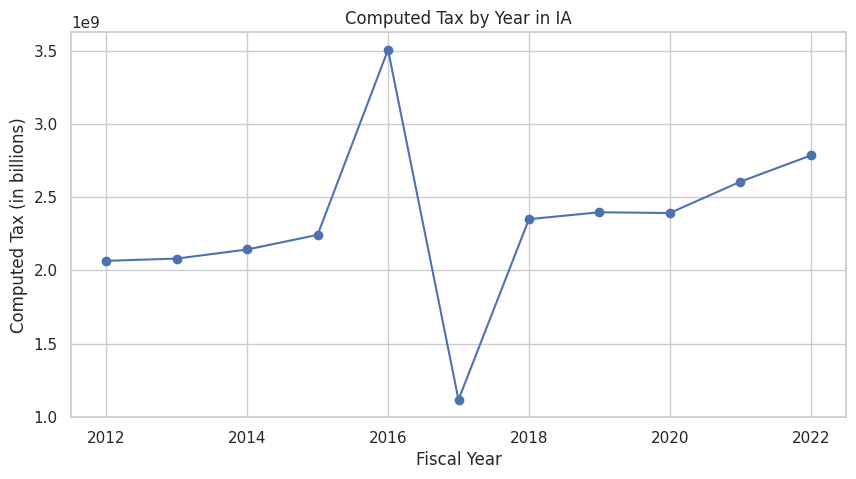

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(tax_by_year['Fiscal Year'], tax_by_year['Computed Tax'], marker='o')
plt.title('Computed Tax by Year in IA')
plt.xlabel('Fiscal Year')
plt.ylabel('Computed Tax (in billions)')
plt.grid(True)
plt.show()

In [68]:
heatmap_county_tax = df2.pivot_table(index='Fiscal Year', columns='County', values='Computed Tax', aggfunc='sum')
print(heatmap_county_tax)

County            Adair       Adams   Allamakee    Appanoose     Audubon  \
Fiscal Year                                                                
2012         3388812.00  1559340.00  5648573.00   5976384.00  2051058.00   
2013         3380213.00  1625816.00  5722972.00   5886639.00  1983628.00   
2014         3301229.00  2050253.00  6068303.00   6017048.00  2070268.00   
2015         3601254.00  2250370.00  6067876.00   6417678.00  2141824.00   
2016         5629125.00  3258070.00  9419351.00  10007593.00  3214357.00   
2017         1778773.00   909850.00  2969478.00   3194065.00  1006189.00   
2018         3792447.00  1986184.00  6481689.00   7459183.00  2123802.00   
2019         4318898.00  1965361.00  6423854.00   8320721.00  2286730.00   
2020         4478964.84  1975257.25  6413798.14   7303479.84  2323836.10   
2021         4416956.64  2061497.63  7284578.88   7950141.16  2521975.75   
2022         4180124.15  1793596.17  6949059.04   8020577.36  2456240.57   

County     

In [69]:
# Calculate the total amount of taxes collected for each year / Рассчитать общую сумму налогов, собранных за каждый год
total_tax_per_year = heatmap_county_tax.sum(axis=1)
# Calculate the percentage of each county's taxes to the total taxes for each year / Рассчитать процентное соотношение налогов каждого округа к общей сумме налогов за каждый год
tax_percentage = heatmap_county_tax.divide(total_tax_per_year, axis=0) * 100
tax_percentage_rounded = tax_percentage.round(2)
print(tax_percentage_rounded)

County       Adair  Adams  Allamakee  Appanoose  Audubon  Benton  Black Hawk  \
Fiscal Year                                                                    
2012          0.16   0.08       0.27       0.29     0.10    0.36        5.08   
2013          0.16   0.08       0.28       0.28     0.10    0.34        5.12   
2014          0.15   0.10       0.28       0.28     0.10    0.35        5.08   
2015          0.16   0.10       0.27       0.29     0.10    0.35        4.94   
2016          0.16   0.09       0.27       0.29     0.09    0.34        4.92   
2017          0.16   0.08       0.27       0.29     0.09    0.33        4.92   
2018          0.16   0.08       0.28       0.32     0.09    0.34        4.81   
2019          0.18   0.08       0.27       0.35     0.10    0.34        4.79   
2020          0.19   0.08       0.27       0.31     0.10    0.35        4.88   
2021          0.17   0.08       0.28       0.31     0.10    0.36        5.10   
2022          0.15   0.06       0.25    

In [70]:
# Calculate the average percentage for each county / Рассчитать средний процент по каждому округу
average_tax_percentage_by_county = tax_percentage_rounded.mean(axis=0)
# Top 20 counties with the highest average percentage of computed tax / Первые 20 округов с самым высоким средним процентом computed tax
top_20_counties = average_tax_percentage_by_county.nlargest(20)
print(top_20_counties)

County
Polk             21.129091
Linn             10.016364
Scott             6.942727
Black Hawk        4.979091
Johnson           4.742727
Woodbury          4.337273
Dubuque           3.423636
Dallas            3.213636
Pottawattamie     3.132727
Story             2.717273
Cerro Gordo       1.852727
Des Moines        1.450000
Webster           1.359091
Muscatine         1.219091
Clinton           1.191818
Sioux             1.013636
Wapello           1.008182
Marshall          0.979091
Jasper            0.832727
Lee               0.832727
dtype: float64


In [71]:
# Get a list of names of the required 20 counties / Получить список имен нужных 20 округов
top_20_county_names = top_20_counties.index.tolist()
# Filter the DataFrame and leave only the required 20 counties / Отфильтровать DataFrame и оставить только нужные 20 округов
filtered_heatmap_county_tax = tax_percentage_rounded.loc[:, top_20_county_names]
print(filtered_heatmap_county_tax)

County        Polk   Linn  Scott  Black Hawk  Johnson  Woodbury  Dubuque  \
Fiscal Year                                                                
2012         19.63  10.22   7.14        5.08     4.80      4.36     3.55   
2013         20.01  10.30   7.14        5.12     4.85      4.48     3.53   
2014         20.32  10.21   7.08        5.08     4.77      4.42     3.46   
2015         20.59  10.16   6.95        4.94     4.75      4.54     3.48   
2016         21.02  10.02   6.96        4.92     4.82      4.46     3.43   
2017         21.56  10.05   7.03        4.92     4.78      4.36     3.37   
2018         21.73   9.93   6.87        4.81     4.79      4.41     3.36   
2019         21.81   9.87   6.76        4.79     4.73      4.25     3.38   
2020         21.69  10.08   6.67        4.88     4.55      4.20     3.33   
2021         21.57  10.07   6.75        5.10     4.56      4.16     3.39   
2022         22.49   9.27   7.02        5.13     4.77      4.07     3.38   

County     

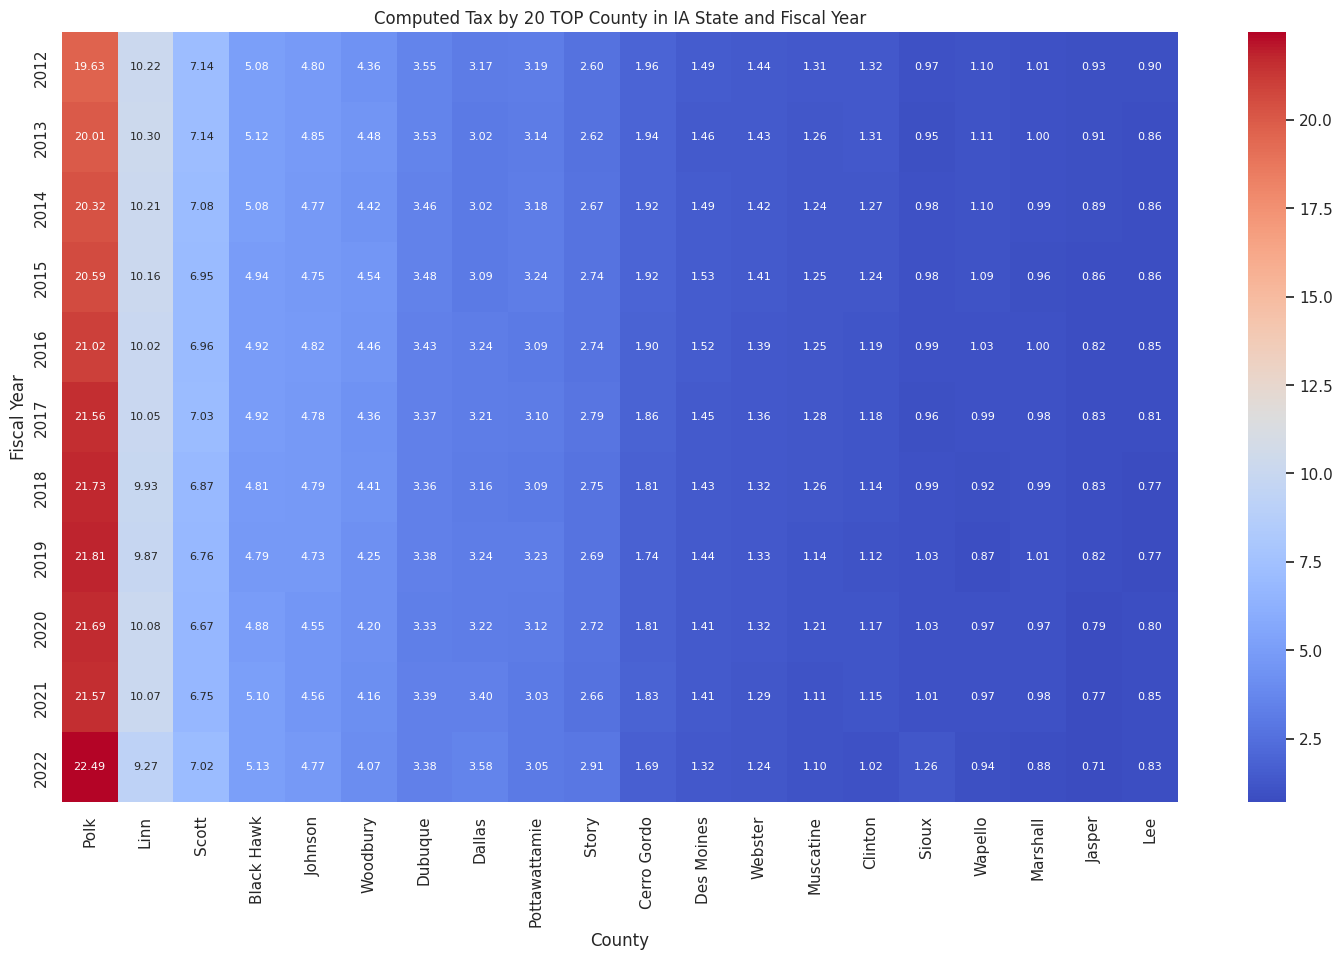

In [72]:
plt.figure(figsize=(18, 10))  # Set the figure size for the heatmap
sns.heatmap(filtered_heatmap_county_tax, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title('Computed Tax by 20 TOP County in IA State and Fiscal Year')
plt.xlabel('County')
plt.ylabel('Fiscal Year')
plt.savefig('/content/PercentTaxByCountyAndYearTop20.png')
plt.show()